In [2]:
#Tesis Maestria CD - Rocío CASTAÑO-
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.neighbors import LocalOutlierFactor  
data = pd.read_csv('./Datos/Version2.csv')


x = data.iloc[:,:-1]
y = data.iloc[:,-1].values
data.head(10)

data.shape

(3908, 23)

In [3]:
#ANALISIS EXPLORATORIO DE DATOS
#columnas_seleccionadas = data[['SubRubro', 'Rubro','Clasificacion','Subclasificacion']]
#print(columnas_seleccionadas.head(10))
#print(data.loc[:9, ['SubRubro', 'Rubro','Clasificacion','Subclasificacion']])
#tabla = data[['SubRubro', 'Rubro','Clasificacion','Subclasificacion']].head(5)

# Imprimir la 
#print(tabulate(tabla, headers=tabla.columns, tablefmt='psql'))
#print(tabla.head())
pd.set_option('display.max_columns', None)
data.head()


,ProductoCodigo,Nombre,ImpuestoId,Impuesto,Descripcion,Activo,CuentaContableCodigo,CuentaContable,SubRubroCodigo,SubRubro,RubroCodigo,Rubro,SubclasificacionCodigo,Subclasificacion,ClasificacionCodigo,Clasificacion,UnidadCodigo,Unidad,PrecioVenta,Stock,MovimientosStock,MovimientoCantidad,ImporteCompra
0,357,BATERIAS,1,IVA 21,BATERIAS DE VEHICULOS,1,10478,REPARACION Y MANTENIMIENTO DE RODADOS,28,BATERÍAS AUTOMOTICES,15,BATERÍAS,7,ENERGÍA,1,CABLES Y ENERGÍA,1,UNIDAD,NaN,3,NaN,NaN,"69670,0014"
1,361,MATERIALES,1,IVA 21,MATERIALES PARA EL AREA DE PRODUCCION,1,10422,MATERIALES COMUNICACIÓN,71,ROUTER DE CONEXIÓN AÉREA Y PARA INTERIOR,37,ROUTERS,6,EQUIPAMIENTO CON PROCESAMIENTO DE INFORMACIÓN,3,EQUIPAMIENTO DE REDES/COMUNICACIONES,1,UNIDAD,NaN,1,NaN,NaN,"14504,262"
2,364,ROPA DE TRABAJO,1,IVA 21,NaN,1,10372,ROPA DE TRABAJO,76,EQUIPAMIENTO Y MATERIALES AUDIO,39,EQUIPAMIENTO AUDIO,16,EQUIPAMIENTO TV/RADIO,4,BIENES E INSUMOS MATERIALES,1,UNIDAD,NaN,10,NaN,NaN,"809293,3516"
3,372,COMBUSTIBLES Y LUBRICANTES,1,IVA 21,COMBUSTIBLES Y LUBRINCANTES.,1,10415,COMBUSTIBLES Y LUBRICANTES,159,REPARACIÓN Y MANTENIMIENTO RODADOS,85,REPARACIÓN Y MANTENIMIENTO RODADOS,31,SERVICIOS DE REPARACIÓN Y MANTENIMIENTO,8,SERVICIOS GENERALES,1,UNIDAD,NaN,12,NaN,NaN,"71329,4947"
4,373,MATERIALES ELECTRICOS,1,IVA 21,NaN,0,10420,MATERIALES ELECTRICOS,70,MATERIALES DE CONEXIONES VARIOS,36,ANTENAS Y ACCESORIOS,6,EQUIPAMIENTO CON PROCESAMIENTO DE INFORMACIÓN,3,EQUIPAMIENTO DE REDES/COMUNICACIONES,1,UNIDAD,NaN,1,0.0,0.0,"41655,0988"


In [4]:
data.shape

(3908, 23)

In [ ]:
#ANALISIS EXPLORATORIO DE DATOS

In [5]:
import nltk
from nltk.corpus import stopwords

# Descarga el recurso si no se ha hecho
nltk.download('stopwords')

# Obtener stopwords en español
stop_words = set(stopwords.words('spanish'))

# Imprimir todas las stopwords
print("Cantidad de stopwords en español:", len(stop_words))
print("Lista de stopwords:")
print(sorted(stop_words))
# -------------------------------------
# 💡 Verifico cuales son las stopwords
# -------------------------------------

Cantidad de stopwords en español: 313
Lista de stopwords:
['a', 'al', 'algo', 'algunas', 'algunos', 'ante', 'antes', 'como', 'con', 'contra', 'cual', 'cuando', 'de', 'del', 'desde', 'donde', 'durante', 'e', 'el', 'ella', 'ellas', 'ellos', 'en', 'entre', 'era', 'erais', 'eran', 'eras', 'eres', 'es', 'esa', 'esas', 'ese', 'eso', 'esos', 'esta', 'estaba', 'estabais', 'estaban', 'estabas', 'estad', 'estada', 'estadas', 'estado', 'estados', 'estamos', 'estando', 'estar', 'estaremos', 'estará', 'estarán', 'estarás', 'estaré', 'estaréis', 'estaría', 'estaríais', 'estaríamos', 'estarían', 'estarías', 'estas', 'este', 'estemos', 'esto', 'estos', 'estoy', 'estuve', 'estuviera', 'estuvierais', 'estuvieran', 'estuvieras', 'estuvieron', 'estuviese', 'estuvieseis', 'estuviesen', 'estuvieses', 'estuvimos', 'estuviste', 'estuvisteis', 'estuviéramos', 'estuviésemos', 'estuvo', 'está', 'estábamos', 'estáis', 'están', 'estás', 'esté', 'estéis', 'estén', 'estés', 'fue', 'fuera', 'fuerais', 'fueran', 'fuer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# --------------------------------------------
# 💻 Eliminar stopwords - Generar N-gramas
# --------------------------------------------
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter

# Descargar stopwords en español
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

# Función para limpiar texto, eliminar stopwords y devolver en mayúsculas
def limpiar_texto(texto):
    if pd.isna(texto):
        return ""
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'\d+', '', texto)  # Eliminar números
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar signos de puntuación
    texto = re.sub(r'\s+', ' ', texto).strip()  # Espacios redundantes
    palabras = texto.split()
    palabras_filtradas = [p for p in palabras if p not in stop_words]
    texto_limpio = ' '.join(palabras_filtradas)
    return texto_limpio.upper()  # Convertir a MAYÚSCULAS al final

# Función para generar n-gramas
def generar_ngrams(texto, n):
    palabras = texto.split()
    return [" ".join(ng) for ng in ngrams(palabras, n)]

# Aplicar limpieza
data['Nombre_Limpio'] = data['Nombre'].apply(limpiar_texto)
data['SubRubro_Limpio'] = data['Nombre'].apply(limpiar_texto)
data['Descripcion_Limpia'] = data['Descripcion'].apply(limpiar_texto)

# Generar n-gramas
data['Monogramas'] = data['Nombre_Limpio'].apply(lambda x: generar_ngrams(x, 1))
data['Bigramas'] = data['Nombre_Limpio'].apply(lambda x: generar_ngrams(x, 2))
data['Trigramas'] = data['Nombre_Limpio'].apply(lambda x: generar_ngrams(x, 3))

# -----------------------------------
# 💡 Verificar si quedaron stopwords
# -----------------------------------
def detectar_stopwords(texto):
    if pd.isna(texto):
        return []
    palabras = texto.lower().split()  # Comparar en minúsculas
    return [p for p in palabras if p in stop_words]

# Aplicar detección
data['Stopwords_residuales'] = data['Nombre_Limpio'].apply(detectar_stopwords)

# Filtrar registros con stopwords aún presentes
con_stopwords = data[data['Stopwords_residuales'].apply(lambda x: len(x) > 0)]

# Imprimir resultado
print(f"\n🟠 Cantidad de registros con stopwords residuales: {len(con_stopwords)}")
print("\n🔍 Ejemplos de stopwords que no se eliminaron correctamente:")
print(con_stopwords[['Nombre', 'Nombre_Limpio', 'Stopwords_residuales']].head(10))

# Mostrar tabla de ejemplo
data[['Nombre', 'Nombre_Limpio', 'Monogramas', 'Bigramas', 'Trigramas']].head()




🟠 Cantidad de registros con stopwords residuales: 0

🔍 Ejemplos de stopwords que no se eliminaron correctamente:
Empty DataFrame
Columns: [Nombre, Nombre_Limpio, Stopwords_residuales]
Index: []


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Nombre,Nombre_Limpio,Monogramas,Bigramas,Trigramas
0,BATERIAS,BATERIAS,[BATERIAS],[],[]
1,MATERIALES,MATERIALES,[MATERIALES],[],[]
2,ROPA DE TRABAJO,ROPA TRABAJO,"[ROPA, TRABAJO]",[ROPA TRABAJO],[]
3,COMBUSTIBLES Y LUBRICANTES,COMBUSTIBLES LUBRICANTES,"[COMBUSTIBLES, LUBRICANTES]",[COMBUSTIBLES LUBRICANTES],[]
4,MATERIALES ELECTRICOS,MATERIALES ELECTRICOS,"[MATERIALES, ELECTRICOS]",[MATERIALES ELECTRICOS],[]


In [7]:
# -----------------------------------
#    🔎 Veo resultados
# -----------------------------------
data[['Nombre', 'Nombre_Limpio', 'Monogramas', 'Bigramas', 'Trigramas']].tail()

,Nombre,Nombre_Limpio,Monogramas,Bigramas,Trigramas
3903,SMARTWATCH NM-PLUS BT,SMARTWATCH NMPLUS BT,"[SMARTWATCH, NMPLUS, BT]","[SMARTWATCH NMPLUS, NMPLUS BT]",[SMARTWATCH NMPLUS BT]
3904,ETHERNET ADAPTADOR STARLINK,ETHERNET ADAPTADOR STARLINK,"[ETHERNET, ADAPTADOR, STARLINK]","[ETHERNET ADAPTADOR, ADAPTADOR STARLINK]",[ETHERNET ADAPTADOR STARLINK]
3905,PIZARRA BLANCA MARCO ALUMINIO,PIZARRA BLANCA MARCO ALUMINIO,"[PIZARRA, BLANCA, MARCO, ALUMINIO]","[PIZARRA BLANCA, BLANCA MARCO, MARCO ALUMINIO]","[PIZARRA BLANCA MARCO, BLANCA MARCO ALUMINIO]"
3906,BORRADOR DE PIZARRA CON 3 MARCADORES,BORRADOR PIZARRA MARCADORES,"[BORRADOR, PIZARRA, MARCADORES]","[BORRADOR PIZARRA, PIZARRA MARCADORES]",[BORRADOR PIZARRA MARCADORES]
3907,PROTECTOR ALTA Y BAJA TENSION DIGITAL 10A 220V,PROTECTOR ALTA BAJA TENSION DIGITAL V,"[PROTECTOR, ALTA, BAJA, TENSION, DIGITAL, V]","[PROTECTOR ALTA, ALTA BAJA, BAJA TENSION, TENS...","[PROTECTOR ALTA BAJA, ALTA BAJA TENSION, BAJA ..."


In [8]:
data[['Nombre', 'Nombre_Limpio', 'Monogramas', 'Bigramas', 'Trigramas']]

,Nombre,Nombre_Limpio,Monogramas,Bigramas,Trigramas
0,BATERIAS,BATERIAS,[BATERIAS],[],[]
1,MATERIALES,MATERIALES,[MATERIALES],[],[]
2,ROPA DE TRABAJO,ROPA TRABAJO,"[ROPA, TRABAJO]",[ROPA TRABAJO],[]
3,COMBUSTIBLES Y LUBRICANTES,COMBUSTIBLES LUBRICANTES,"[COMBUSTIBLES, LUBRICANTES]",[COMBUSTIBLES LUBRICANTES],[]
4,MATERIALES ELECTRICOS,MATERIALES ELECTRICOS,"[MATERIALES, ELECTRICOS]",[MATERIALES ELECTRICOS],[]
...,...,...,...,...,...
3903,SMARTWATCH NM-PLUS BT,SMARTWATCH NMPLUS BT,"[SMARTWATCH, NMPLUS, BT]","[SMARTWATCH NMPLUS, NMPLUS BT]",[SMARTWATCH NMPLUS BT]
3904,ETHERNET ADAPTADOR STARLINK,ETHERNET ADAPTADOR STARLINK,"[ETHERNET, ADAPTADOR, STARLINK]","[ETHERNET ADAPTADOR, ADAPTADOR STARLINK]",[ETHERNET ADAPTADOR STARLINK]
3905,PIZARRA BLANCA MARCO ALUMINIO,PIZARRA BLANCA MARCO ALUMINIO,"[PIZARRA, BLANCA, MARCO, ALUMINIO]","[PIZARRA BLANCA, BLANCA MARCO, MARCO ALUMINIO]","[PIZARRA BLANCA MARCO, BLANCA MARCO ALUMINIO]"
3906,BORRADOR DE PIZARRA CON 3 MARCADORES,BORRADOR PIZARRA MARCADORES,"[BORRADOR, PIZARRA, MARCADORES]","[BORRADOR PIZARRA, PIZARRA MARCADORES]",[BORRADOR PIZARRA MARCADORES]


In [9]:
# Mostrar resultado
data[['Nombre', 'Nombre_Limpio', 'Monogramas', 'Bigramas', 'Trigramas']].tail()

,Nombre,Nombre_Limpio,Monogramas,Bigramas,Trigramas
3903,SMARTWATCH NM-PLUS BT,SMARTWATCH NMPLUS BT,"[SMARTWATCH, NMPLUS, BT]","[SMARTWATCH NMPLUS, NMPLUS BT]",[SMARTWATCH NMPLUS BT]
3904,ETHERNET ADAPTADOR STARLINK,ETHERNET ADAPTADOR STARLINK,"[ETHERNET, ADAPTADOR, STARLINK]","[ETHERNET ADAPTADOR, ADAPTADOR STARLINK]",[ETHERNET ADAPTADOR STARLINK]
3905,PIZARRA BLANCA MARCO ALUMINIO,PIZARRA BLANCA MARCO ALUMINIO,"[PIZARRA, BLANCA, MARCO, ALUMINIO]","[PIZARRA BLANCA, BLANCA MARCO, MARCO ALUMINIO]","[PIZARRA BLANCA MARCO, BLANCA MARCO ALUMINIO]"
3906,BORRADOR DE PIZARRA CON 3 MARCADORES,BORRADOR PIZARRA MARCADORES,"[BORRADOR, PIZARRA, MARCADORES]","[BORRADOR PIZARRA, PIZARRA MARCADORES]",[BORRADOR PIZARRA MARCADORES]
3907,PROTECTOR ALTA Y BAJA TENSION DIGITAL 10A 220V,PROTECTOR ALTA BAJA TENSION DIGITAL V,"[PROTECTOR, ALTA, BAJA, TENSION, DIGITAL, V]","[PROTECTOR ALTA, ALTA BAJA, BAJA TENSION, TENS...","[PROTECTOR ALTA BAJA, ALTA BAJA TENSION, BAJA ..."


In [12]:
# Visualizar filas desde la 100 a la 120 (inclusive)
data.loc[100:120, ['Nombre', 'Nombre_Limpio', 'Monogramas', 'Bigramas', 'Trigramas']]
data.loc[1200:1230, ['Nombre', 'Nombre_Limpio']]

,Nombre,Nombre_Limpio
1200,PATCH CORD UTP CAT 5E - 2M ...,PATCH CORD UTP CAT M
1201,PATCH CORD UTP CAT 5E - 3M ...,PATCH CORD UTP CAT M
1202,"SWITCH 24P TEG1024D ""TENDA"" SIN CABLE POWER ...",SWITCH P TEGD TENDA CABLE POWER
1203,"SWITCH 8P S108 ""TENDA"" ...",SWITCH P S TENDA
1204,"GABINETE ESTANCO METALICO 45CM X 45CM X 22,5CM...",GABINETE ESTANCO METALICO CM X CM X CM
1205,"GABINETE ESTANCO METALICA 30CM X 45CM X 22,5CM...",GABINETE ESTANCO METALICA CM X CM X CM
1206,BOTIN TITANIUM 43 ...,BOTIN TITANIUM
1207,CEMENTO X 50 KG ...,CEMENTO X KG
1208,ARENA X MTS ...,ARENA X MTS
1209,PIEDRA X MEDIO MTS,PIEDRA X MEDIO MTS


In [10]:
# Generar n-gramas
data['MonogramasD'] = data['Descripcion_Limpia'].apply(lambda x: generar_ngrams(x, 1))
data['BigramasD'] = data['Descripcion_Limpia'].apply(lambda x: generar_ngrams(x, 2))
data['TrigramasD'] = data['Descripcion_Limpia'].apply(lambda x: generar_ngrams(x, 3))

data[['Descripcion', 'Descripcion_Limpia', 'MonogramasD', 'BigramasD', 'TrigramasD']].tail()

,Descripcion,Descripcion_Limpia,MonogramasD,BigramasD,TrigramasD
3903,relojes digitales para Donacion TK 21216/2024,RELOJES DIGITALES DONACION TK,"[RELOJES, DIGITALES, DONACION, TK]","[RELOJES DIGITALES, DIGITALES DONACION, DONACI...","[RELOJES DIGITALES DONACION, DIGITALES DONACIO..."
3904,NaN,,[],[],[]
3905,NaN,,[],[],[]
3906,NaN,,[],[],[]
3907,NaN,,[],[],[]


In [11]:
# -------------------------------------
#  Analisis de frecuencia - metricas
#         Calcular TF-IDF
# -------------------------------------

# Calculo frecuencia de términos
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
#Contar la aparición de palabras clave en el dataset
def calcular_frecuencia(lista_textos):
    frecuencia = Counter()
    for texto in lista_textos:
        frecuencia.update(texto.split())
    return frecuencia

frecuencia_terminos = calcular_frecuencia(data['Nombre_Limpio'])

# Calcular TF-IDF : Calcular la importancia de cada término en el contexto del dataset
tfidf_vectorizer = TfidfVectorizer()
tfidf_matriz = tfidf_vectorizer.fit_transform(data['Nombre_Limpio'])
tfidf_dataframe = pd.DataFrame(tfidf_matriz.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Mostrar resultado
#data[['Nombre', 'Nombre_Limpio', 'Monogramas', 'Bigramas', 'Trigramas']].head(), 
frecuencia_terminos,
#tfidf_dataframe.head()


(Counter({'BATERIAS': 8,
          'MATERIALES': 11,
          'ROPA': 2,
          'TRABAJO': 4,
          'COMBUSTIBLES': 1,
          'LUBRICANTES': 1,
          'ELECTRICOS': 2,
          'COMUNICACION': 2,
          'COMUNICACIÓN': 1,
          'RESMAS': 1,
          'PAPELERÍA': 1,
          'FERRETERÍA': 1,
          'ART': 2,
          'LIBRERIA': 3,
          'TONER': 45,
          'NODO': 33,
          'TORRES': 2,
          'MET': 3,
          'MANO': 29,
          'OBRA': 6,
          'POSTES': 3,
          'MADERA': 18,
          'COMPUTACION': 1,
          'TOKEN': 1,
          'ROUTERS': 1,
          'C': 48,
          'FUENTE': 58,
          'PESCENOGRAFIA': 1,
          'CANAL': 12,
          'COMPUTADORAS': 4,
          'VENTA': 5,
          'P': 87,
          'ANTENA': 14,
          'PANEL': 34,
          'MIKROTIK': 9,
          'SOPORTE': 37,
          'CIBEREGURIDAD': 1,
          'ELECTRODOMÉSTICOS': 1,
          'PLA': 1,
          'EMPRESA': 1,
          'SILLA

In [12]:
# -------------------------------------
#  Analisis de frecuencia - metricas (filtrado)
#         Calcular TF-IDF
# -------------------------------------

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

#ordenados descendente

# Calcular frecuencia de términos
def calcular_frecuencia(lista_textos):
    frecuencia = Counter()
    for texto in lista_textos:
        if pd.notna(texto):
            frecuencia.update(texto.split())
    return frecuencia

frecuencia_terminos = calcular_frecuencia(data['Nombre_Limpio'])

# Ordenar términos por frecuencia en orden descendente
frecuencia_terminos_ordenados = dict(sorted(frecuencia_terminos.items(), key=lambda item: item[1], reverse=True))

# Filtrar términos poco frecuentes (apariciones menores a 3 veces)
umbral_frecuencia = 3
terminos_frecuentes = {t for t, f in frecuencia_terminos.items() if f >= umbral_frecuencia}

def filtrar_terminos_poco_frecuentes(texto):
    if pd.isna(texto):
        return ""
    palabras = texto.split()
    palabras = [p for p in palabras if p in terminos_frecuentes]
    return ' '.join(palabras)

data['Nombre_Limpio'] = data['Nombre_Limpio'].apply(filtrar_terminos_poco_frecuentes)

# Mostrar términos filtrados ordenados por frecuencia
frecuencia_terminos_ordenados

{'MM': 437,
 'X': 402,
 'CABLE': 213,
 'M': 138,
 'V': 126,
 'FIBRA': 124,
 'MTS': 118,
 'MOD': 115,
 'PATCH': 109,
 'GB': 108,
 'CORD': 98,
 'CAT': 95,
 'DISCO': 91,
 'W': 90,
 'PROYECTO': 90,
 'P': 87,
 'CAJA': 83,
 'G': 80,
 'ANR': 80,
 'LLAVE': 73,
 'PVC': 70,
 'KIT': 67,
 'CM': 65,
 'HP': 60,
 'FUENTE': 58,
 'NOTEBOOK': 58,
 'N': 57,
 'BATERIA': 56,
 'NEGRO': 55,
 'FO': 55,
 'RAEES': 54,
 'LED': 53,
 'USB': 53,
 'PLACA': 53,
 'Nº': 51,
 'PINZA': 49,
 'C': 48,
 'RJ': 48,
 'SFP': 48,
 'AC': 46,
 'TONER': 45,
 'UTP': 45,
 'I': 42,
 'SWITCH': 42,
 'GHZ': 40,
 'XMM': 40,
 'CAÑO': 40,
 'SSD': 39,
 'MEMORIA': 38,
 'CAMARA': 38,
 'SOPORTE': 37,
 'MECHA': 37,
 'GABINETE': 36,
 'PUNTA': 36,
 'TIPO': 36,
 'CONECTOR': 36,
 'RACK': 35,
 'MODULO': 35,
 'RIGIDO': 35,
 'TB': 35,
 'MONITOR': 35,
 'PANEL': 34,
 'NODO': 33,
 'UPS': 33,
 'T': 33,
 'CORE': 33,
 'S': 32,
 'TAPA': 32,
 'LT': 31,
 'TERMINAL': 30,
 'DDR': 30,
 'KM': 30,
 'MANO': 29,
 'PC': 29,
 'U': 29,
 'CINTA': 29,
 'TERMICA': 29,
 'VID

In [13]:
# -------------------------------------
#     LabelEncoder SubRubro
#    Como SubRubro es categórica
# -------------------------------------
#LabelEncoder:Como SubRubro es categórica , debe codificarse como números, usando LabelEncoder.
from sklearn.preprocessing import LabelEncoder

# Instanciar el codificador
le = LabelEncoder()

# Codificar la variable 'SubRubro'
data['SubRubro_encoded'] = le.fit_transform(data['SubRubro'])

# Ver las primeras codificaciones como referencia
print(data[['SubRubro', 'SubRubro_encoded']].drop_duplicates())

# Variable objetivo (target) para los modelos
y = data['SubRubro_encoded']



                                               SubRubro  SubRubro_encoded
0                                  BATERÍAS AUTOMOTICES                11
1              ROUTER DE CONEXIÓN AÉREA Y PARA INTERIOR               102
2                       EQUIPAMIENTO Y MATERIALES AUDIO                49
3                    REPARACIÓN Y MANTENIMIENTO RODADOS                99
4                       MATERIALES DE CONEXIONES VARIOS                65
...                                                 ...               ...
3801  SOHO (MODEM-ROUTER-SWITCH DE TIPO SMALL OFFICE...               106
3822                                 LICENCIAS SOFTWARE                61
3835                                            METALES                70
3838                                           PLASTICO                93
3839                                        COMPONENTES                37

[116 rows x 2 columns]


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Calcular TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matriz = tfidf_vectorizer.fit_transform(data['Nombre_Limpio'])

# Convertir a DataFrame
tfidf_dataframe = pd.DataFrame(tfidf_matriz.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Verificar que existe y está correcto
print(tfidf_dataframe.head())


    aa  aaa   ab  abierto  abrazadera  abrochadora   ac  acceso  access  \
0  0.0  0.0  0.0      0.0         0.0          0.0  0.0     0.0     0.0   
1  0.0  0.0  0.0      0.0         0.0          0.0  0.0     0.0     0.0   
2  0.0  0.0  0.0      0.0         0.0          0.0  0.0     0.0     0.0   
3  0.0  0.0  0.0      0.0         0.0          0.0  0.0     0.0     0.0   
4  0.0  0.0  0.0      0.0         0.0          0.0  0.0     0.0     0.0   

   aceite  acero  acerogalv  acondicionado  acondicionador  adaptador  \
0     0.0    0.0        0.0            0.0             0.0        0.0   
1     0.0    0.0        0.0            0.0             0.0        0.0   
2     0.0    0.0        0.0            0.0             0.0        0.0   
3     0.0    0.0        0.0            0.0             0.0        0.0   
4     0.0    0.0        0.0            0.0             0.0        0.0   

   adhesivas  adhesivo  adm  adss  aerosol  aflat  agenda  agm  agua  aguja  \
0        0.0       0.0  0.0   0

In [18]:
# Revisión rápida de la densidad
print("Porcentaje de ceros:", (tfidf_dataframe == 0).sum().sum() / tfidf_dataframe.size * 100)

# Revisar si al menos algunas celdas tienen valores positivos
print("Cantidad de valores > 0:", (tfidf_dataframe > 0).sum().sum())

# Mostrar filas específicas donde haya valores distintos de 0
print(tfidf_dataframe[(tfidf_dataframe > 0).any(axis=1)].head())

Porcentaje de ceros: 99.72738859637529
Cantidad de valores > 0: 10643
    aa  aaa   ab  abierto  abrazadera  abrochadora   ac  acceso  access  \
0  0.0  0.0  0.0      0.0         0.0          0.0  0.0     0.0     0.0   
1  0.0  0.0  0.0      0.0         0.0          0.0  0.0     0.0     0.0   
2  0.0  0.0  0.0      0.0         0.0          0.0  0.0     0.0     0.0   
4  0.0  0.0  0.0      0.0         0.0          0.0  0.0     0.0     0.0   
5  0.0  0.0  0.0      0.0         0.0          0.0  0.0     0.0     0.0   

   aceite  acero  acerogalv  acondicionado  acondicionador  adaptador  \
0     0.0    0.0        0.0            0.0             0.0        0.0   
1     0.0    0.0        0.0            0.0             0.0        0.0   
2     0.0    0.0        0.0            0.0             0.0        0.0   
4     0.0    0.0        0.0            0.0             0.0        0.0   
5     0.0    0.0        0.0            0.0             0.0        0.0   

   adhesivas  adhesivo  adm  adss  aeros

In [15]:
#*********✔️ VECTORIZACION*****************************************************
# 1. Vectorización TF-IDF
# Usamos unigramas y bigramas, y quitamos stopwords en español

#**************************************************************
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import pandas as pd



# Usamos unigramas y bigramas, y quitamos stopwords en español
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))

# Ajustar y transformar los nombres limpios
tfidf_matriz = tfidf_vectorizer.fit_transform(data['Nombre_Limpio'])

# Convertir a DataFrame para visualización o análisis
tfidf_dataframe = pd.DataFrame(tfidf_matriz.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("TF-IDF shape con n-gramas:", tfidf_dataframe.shape)

# 2. Codificación de SubRubro
le = LabelEncoder()
data['SubRubro_encoded'] = le.fit_transform(data['SubRubro'])




TF-IDF shape con n-gramas: (3908, 4179)


In [20]:
# -------------------------------------
#     # Hasta aca tengo :
# -------------------------------------

tfidf_dataframe #como X (features vectorizadas).

y = SubRubro_encoded #como target.

NameError: name 'SubRubro_encoded' is not defined

In [ ]:
#ahora modelado y analsis comparativo

In [16]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

#Luego, cuando filtramos las clases con ≥2 ejemplos, algunas etiquetas desaparecieron 
#XGBoost no tolera esos saltos.Hay que relabel las clases después de filtrar para que sean continuas (0, 1, 2, 3, 4, 5,...).
#volver a usar LabelEncoder después de filtrar.
from sklearn.preprocessing import LabelEncoder

# Variables
X = tfidf_dataframe
y = data['SubRubro_encoded']

#***********agrego esto porque daba error

# Contar cuántas veces aparece cada clase
conteo_clases = data['SubRubro_encoded'].value_counts()

# Filtrar para quedarnos solo con las clases que tienen al menos 2 productos
clases_validas = conteo_clases[conteo_clases >= 2].index

# Filtrar el dataset
data_filtrado = data[data['SubRubro_encoded'].isin(clases_validas)]

# *** NUEVO: Reasignar etiquetas consecutivas ***
le2 = LabelEncoder()
data_filtrado['SubRubro_encoded_relabel'] = le2.fit_transform(data_filtrado['SubRubro_encoded'])
# SubRubro_encoded_relabel es una nueva columna con las etiquetas consecutivas correctas.

# Redefinir X e y
X = tfidf_vectorizer.transform(data_filtrado['Nombre_Limpio']).toarray()
y = data_filtrado['SubRubro_encoded_relabel']  # Ahora usamos la versión "relabel"
#**********************************************


# Definir todas las clases posibles (importante para XGBoost)
todas_las_clases = np.unique(y)



C:\Users\Usuario\AppData\Local\Temp\ipykernel_12952\3178245203.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrado['SubRubro_encoded_relabel'] = le2.fit_transform(data_filtrado['SubRubro_encoded'])


In [62]:
# -------------------------------------
#     Aplicación de modelos
# -------------------------------------
# ⚠️ACLARACIONES:
# Aqui me dio error porque algunas clases Tienes clases en SubRubro_encoded que solo tienen 1 ejemplo.
# Cuando pides stratify=y, Sklearn necesita mínimo 2 muestras por clase para poder dividir entre train y test.
# No se puede dividir 1 solo dato en train/test, por eso explota.
# el dataset tiene algunos subrubros muy raros o casi vacíos (con 1 solo producto).
# Esto complica el modelado porque no se puede entrenar ni testear bien con una clase así.
# entonces debi eliminar el dataset aquellas clases (SubRubro_encoded) que tienen menos de 2 ejemplos
# -------------------------------------
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

#Luego, cuando filtramos las clases con ≥2 ejemplos, algunas etiquetas desaparecieron 
#XGBoost no tolera esos saltos.Hay que relabel las clases después de filtrar para que sean continuas (0, 1, 2, 3, 4, 5,...).
#volver a usar LabelEncoder después de filtrar.
from sklearn.preprocessing import LabelEncoder

# Variables
X = tfidf_dataframe
y = data['SubRubro_encoded']

#***********agrego esto porque daba error

# Contar cuántas veces aparece cada clase
conteo_clases = data['SubRubro_encoded'].value_counts()

# Filtrar para quedarnos solo con las clases que tienen al menos 2 productos
clases_validas = conteo_clases[conteo_clases >= 2].index

# Filtrar el dataset
data_filtrado = data[data['SubRubro_encoded'].isin(clases_validas)]

# *** NUEVO: Reasignar etiquetas consecutivas ***
le2 = LabelEncoder()
data_filtrado['SubRubro_encoded_relabel'] = le2.fit_transform(data_filtrado['SubRubro_encoded'])
# SubRubro_encoded_relabel es una nueva columna con las etiquetas consecutivas correctas.

# Redefinir X e y
X = tfidf_vectorizer.transform(data_filtrado['Nombre_Limpio']).toarray()
y = data_filtrado['SubRubro_encoded_relabel']  # Ahora usamos la versión "relabel"
#**********************************************



# Definir todas las clases posibles (importante para XGBoost)
todas_las_clases = np.unique(y)





C:\Users\Usuario\AppData\Local\Temp\ipykernel_1408\2656807289.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrado['SubRubro_encoded_relabel'] = le2.fit_transform(data_filtrado['SubRubro_encoded'])


In [ ]:
## NUEVOS MODELOS##

In [ ]:
#--------------------------------------------------
#   🔎🔎 ✔️VALIDACIÓN
#  Busca de los hipermarametros para Random Forest
#--------------------------------------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import time

# Datos
X = tfidf_vectorizer.transform(data_filtrado['Nombre_Limpio']).toarray()
y = data_filtrado['SubRubro_encoded_relabel']

# Definir la cuadrícula de hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Instanciar modelo base
rf = RandomForestClassifier(random_state=42)

# Instanciar GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,  # validación cruzada de 5 folds
                           scoring='f1_weighted',
                           n_jobs=-1,  # paraleliza el proceso
                           verbose=2)

# Ejecutar búsqueda
inicio = time.time()
grid_search.fit(X, y)
fin = time.time()

# Resultados
print("\nMejores hiperparámetros:")
print(grid_search.best_params_)

print(f"\nMejor F1-Score (cv): {grid_search.best_score_:.4f}")
print(f"Tiempo total de búsqueda: {fin - inicio:.2f} segundos")


In [50]:
#------------------------------------------------------------
#   💻💥 ✔️VALIDACIÓN
#  RANDOM FOREST - CROSS VALIDACION CON hiperparametros optimos
#-------------------------------------------------------------
import numpy as np
import pandas as pd
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score

# --- Datos ---
X = tfidf_vectorizer.transform(data_filtrado['Nombre_Limpio']).toarray()
y = data_filtrado['SubRubro_encoded_relabel'].reset_index(drop=True)

# --- Modelo con mejores hiperparámetros ---
rf_model = RandomForestClassifier(
    bootstrap=True,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100,#era 100
    random_state=42
)

# --- Validación cruzada ---
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
resultados = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    inicio = time.time()
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    fin = time.time()

    # Matriz de confusión global (todas clases)
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
    TP = np.diag(cm)
    FP = cm.sum(axis=0) - TP
    FN = cm.sum(axis=1) - TP
    TN = cm.sum() - (TP + FP + FN)

    # Evitar divisiones por cero
    precision_clase = np.divide(TP, TP + FP, out=np.zeros_like(TP, dtype=float), where=(TP + FP) != 0)
    recall_clase = np.divide(TP, TP + FN, out=np.zeros_like(TP, dtype=float), where=(TP + FN) != 0)
    accuracy_clase = np.divide(TP + TN, TP + TN + FP + FN, out=np.zeros_like(TP, dtype=float), where=(TP + TN + FP + FN) != 0)

    # Promedios macro por pliegue
    acc = accuracy_clase.mean()
    prec = precision_clase.mean()
    rec = recall_clase.mean()
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    tiempo = fin - inicio

    resultados.append({
        'Accuracy': acc,
        'Precisión': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Tiempo (s)': tiempo
    })

# --- Mostrar resultados por pliegue ---
resultados_df = pd.DataFrame(resultados)
print("\nResultados por pliegue:")
print(resultados_df.round(4))

# --- Promedios ---
promedios = resultados_df.mean().to_frame().T
print("\nPromedios:")
print(promedios.round(4))


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



Resultados por pliegue:
   Accuracy  Precisión  Recall  F1-Score  Tiempo (s)
0    0.9945     0.5512  0.5059    0.5459     14.5207
1    0.9951     0.5794  0.5613    0.6171     14.7311
2    0.9945     0.5300  0.5103    0.5719     15.1886
3    0.9944     0.5451  0.5026    0.5625     15.0333
4    0.9953     0.6103  0.5970    0.6454     13.9368

Promedios:
   Accuracy  Precisión  Recall  F1-Score  Tiempo (s)
0    0.9948     0.5632  0.5354    0.5885     14.6821


In [ ]:
#----------------------------------------
#   🔎 VALIDACIÓN
#  Busca de los hipermarametros para SVM
#----------------------------------------
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score
import time

# 1. Datos
X = tfidf_vectorizer.transform(data_filtrado['Nombre_Limpio']).toarray()
y = data_filtrado['SubRubro_encoded_relabel']

# 2. Definir la grilla de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10],                     # Regularización
    'kernel': ['linear', 'rbf'],          # Tipos de kernel
    'gamma': ['scale', 'auto']            # Solo para kernels no lineales
}

# 3. Definir modelo base
modelo_svm = SVC()

# 4. Definir GridSearchCV con F1-score como métrica
grid = GridSearchCV(estimator=modelo_svm,
                    param_grid=param_grid,
                    scoring=make_scorer(f1_score, average='weighted'),
                    cv=5,
                    n_jobs=-1,
                    verbose=2)

# 5. Ajuste con control de tiempo
inicio = time.time()
grid.fit(X, y)
fin = time.time()

# 6. Resultados
print("\nMejores hiperparámetros:")
print(grid.best_params_)
print(f"\nMejor F1-Score (cv): {grid.best_score_:.4f}")
print(f"Tiempo total de búsqueda: {fin - inicio:.2f} segundos")

#Mejores hiperparámetros:
#{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

#Mejor F1-Score (cv): 0.6211
#Tiempo total de búsqueda: 2122.02 segundos


In [34]:
#------------------------------------------------------------------
#    💻💥 ✔️VALIDACIÓN VALIDACIÓN
#  Aplicación Cross Validation con mejores hiperparámetros para SVM
#------------------------------------------------------------------

import numpy as np
import pandas as pd
import time
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Supón que tienes el DataFrame `data_filtrado` ya cargado
# Paso 1: TF-IDF y extracción de variables
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words='english')
X = tfidf_vectorizer.fit_transform(data_filtrado['Nombre_Limpio']).toarray()
y = data_filtrado['SubRubro_encoded_relabel'].reset_index(drop=True)

# Paso 2: Definir modelo SVM con los mejores hiperparámetros
modelo = SVC(C=10, gamma='scale', kernel='linear')

# Paso 3: Validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
resultados = []

for i, (train_index, test_index) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    inicio = time.time()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    fin = time.time()

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    tiempo = fin - inicio

    resultados.append({
        'Pliegue': i,
        'Accuracy': acc,
        'Precisión': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Tiempo (s)': tiempo
    })

# Mostrar resultados
df_resultados = pd.DataFrame(resultados)
print("\nResultados por pliegue:")
print(df_resultados.round(4))

print("\nPromedios:")
print(df_resultados[['Accuracy', 'Precisión', 'Recall', 'F1-Score', 'Tiempo (s)']].mean().round(4))



C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



Resultados por pliegue:
   Pliegue  Accuracy  Precisión  Recall  F1-Score  Tiempo (s)
0        1    0.6885     0.7086  0.5055    0.6764     29.0638
1        2    0.7154     0.7287  0.5941    0.7040     28.8397
2        3    0.6996     0.7311  0.5443    0.6936     29.0091
3        4    0.6829     0.7110  0.5278    0.6727     29.1496
4        5    0.7497     0.7603  0.6466    0.7387     30.1970

Promedios:
Accuracy       0.7072
Precisión      0.7279
Recall         0.5636
F1-Score       0.6971
Tiempo (s)    29.2518
dtype: float64


In [ ]:
#----------------------------------------
#   🔎🔎 ✔️ VALIDACIÓN
#  Busca de los hipermarametros para Regresión Logística
#----------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import time

# --- Definir el espacio de búsqueda de hiperparámetros ---
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],            # Fuerza de regularización
    'penalty': ['l2'],                       # Penalización (l1 requiere 'liblinear')
    'solver': ['lbfgs', 'saga'],             # Algoritmos que soportan 'l2' y multiclase
    'multi_class': ['multinomial'],          # Para clasificación multiclase
    'max_iter': [500, 1000]                  # Iteraciones máximas para convergencia
}

# --- Instanciar modelo base ---
modelo_base = LogisticRegression()

# --- Definir el GridSearch ---
grid = GridSearchCV(
    estimator=modelo_base,
    param_grid=param_grid,
    scoring=make_scorer(f1_score, average='weighted'),
    cv=5,
    n_jobs=-1,
    verbose=2
)

# --- Ejecutar búsqueda ---
inicio = time.time()
grid.fit(X_train, y_train)
fin = time.time()

# --- Mostrar resultados ---
print("Mejores hiperparámetros:")
print(grid.best_params_)
print(f"\nMejor F1-Score (cv): {round(grid.best_score_, 4)}")
print(f"Tiempo total de búsqueda: {round(fin - inicio, 2)} segundos")

# Mejores hiperparámetros:
# {'C': 100, 'max_iter': 1000, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'saga'}

# Mejor F1-Score (cv): 0.6274
# Tiempo total de búsqueda: 53892.58 segundos


In [ ]:
# #-------------------------------------------------------------------------
#   💥💻⚠️ VALIDACIÓN
#  REGRESIÓN LOGÍSTICA - Cross validacion con  los hipermarametros óptimos
# #-------------------------------------------------------------------------
import numpy as np
import pandas as pd
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Datos
X = tfidf_vectorizer.transform(data_filtrado['Nombre_Limpio']).toarray()
y = data_filtrado['SubRubro_encoded_relabel'].reset_index(drop=True)

# Modelo con mejores hiperparámetros
modelo = LogisticRegression(
    C=100,
    max_iter=1000,
    multi_class='multinomial',
    penalty='l2',
    solver='saga'
)

# Validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
resultados = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
    print(f"Pliegue {fold+1}")
    
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    inicio = time.time()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    fin = time.time()
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    tiempo = fin - inicio
    
    resultados.append({
        'Accuracy': acc,
        'Precisión': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Tiempo (s)': tiempo
    })

# Mostrar resultados
df_resultados = pd.DataFrame(resultados)
print("\nResultados por pliegue:")
print(df_resultados.round(4))

print("\nPromedios:")
print(df_resultados.mean().round(4))

# Pliegue 5

# Resultados por pliegue:
#    Accuracy  Precisión  Recall  F1-Score  Tiempo (s)
# 0    0.7064     0.5793  0.5241    0.5339   6896.2770
# 1    0.7423     0.6337  0.5985    0.5907   6948.1079
# 2    0.7137     0.5951  0.5395    0.5486   6898.3654
# 3    0.7060     0.5888  0.5347    0.5399   6870.5371
# 4    0.7497     0.6183  0.6093    0.5970   6869.4316

# Promedios:
# Accuracy         0.7236
# Precisión        0.6031
# Recall           0.5612
# F1-Score         0.5620
# Tiempo (s)    6896.5438
# dtype: float64



In [ ]:
#----------------------------------------
#   🔎🔎 ✔️ VALIDACIÓN
#  Busca de los hipermarametros para Naive Bayes
#----------------------------------------
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import make_scorer, f1_score
import time

# --- Datos (usamos los mismos ya preparados) ---
X = tfidf_vectorizer.transform(data_filtrado['Nombre_Limpio']).toarray()
y = data_filtrado['SubRubro_encoded_relabel']

# --- Modelo base ---
modelo = MultinomialNB()

# --- Definir la grilla de parámetros ---
param_grid = {
    'alpha': [0.1, 0.3, 0.5, 0.7, 1.0]
}

# --- Configurar GridSearchCV ---
grid_search_nb = GridSearchCV(
    estimator=modelo,
    param_grid=param_grid,
    scoring=make_scorer(f1_score, average='weighted'),
    cv=5,
    n_jobs=-1,
    verbose=2
)

# --- Ejecutar búsqueda ---
inicio = time.time()
grid_search_nb.fit(X, y)
fin = time.time()

# --- Resultados ---
print("Mejores hiperparámetros:")
print(grid_search_nb.best_params_)

print(f"\nMejor F1-Score (cv): {grid_search_nb.best_score_:.4f}")
print(f"Tiempo total de búsqueda: {fin - inicio:.2f} segundos")

#Mejores hiperparámetros:
#{'alpha': 0.1}

#Mejor F1-Score (cv): 0.6143
#Tiempo total de búsqueda: 11.79 segundos


In [ ]:
#   💥💻⚠️ VALIDACIÓN --------------------------------------------
#  NAIVE BAYES - Aplicación de los hiperparametros encontrados  
#   Cross Validation
#------------------------------------------------------------------
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer

# --- Paso 1: Vectorización TF-IDF ---
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
X = tfidf_vectorizer.fit_transform(data_filtrado['Nombre_Limpio']).toarray()
y = data_filtrado['SubRubro_encoded_relabel'].reset_index(drop=True)

# --- Paso 2: Modelo con mejor hiperparámetro ---
modelo = MultinomialNB(alpha=0.1)

# --- Paso 3: Validación cruzada ---
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
resultados = []

for i, (train_index, test_index) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    inicio = time.time()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    fin = time.time()

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
    support = cm.sum(axis=1)

    TP = np.diag(cm)
    FP = cm.sum(axis=0) - TP
    FN = cm.sum(axis=1) - TP
    TN = cm.sum() - (TP + FP + FN)

    # Accuracy global
    
    acc = np.trace(cm) / np.sum(cm) 

    # Métricas por clase
    precision_clase = np.divide(TP, TP + FP, out=np.zeros_like(TP, dtype=float), where=(TP + FP) != 0)
    recall_clase = np.divide(TP, TP + FN, out=np.zeros_like(TP, dtype=float), where=(TP + FN) != 0)
    f1_clase = np.divide(2 * precision_clase * recall_clase, precision_clase + recall_clase,
                         out=np.zeros_like(precision_clase, dtype=float), where=(precision_clase + recall_clase) != 0)

    # Promedios ponderados
    total = support.sum()
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    # prec = np.sum(precision_clase * support) / total
    # rec = np.sum(recall_clase * support) / total
    f1 = np.sum(f1_clase * support) / total
    tiempo = fin - inicio

    resultados.append({
        'Accuracy': acc,
        'Precisión': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Tiempo (s)': tiempo
    })

    

# --- Mostrar resultados ---
resultados_df = pd.DataFrame(resultados)
print("\nResultados por pliegue:")
print(resultados_df.round(4))

print("\nPromedios:")
print(resultados_df.mean().to_frame().T.round(4))

# Resultados por pliegue:
#    Accuracy  Precisión  Recall  F1-Score  Tiempo (s)
# 0    0.6782     0.5222  0.4289    0.6458      0.1042
# 1    0.7090     0.5199  0.4366    0.6768      0.0794
# 2    0.6881     0.5149  0.4095    0.6619      0.0939
# 3    0.6765     0.5131  0.4291    0.6449      0.0945
# 4    0.7227     0.5451  0.4689    0.6948      0.1098

# Promedios:
#    Accuracy  Precisión  Recall  F1-Score  Tiempo (s)
# 0    0.6949      0.523  0.4346    0.6648      0.0964



In [48]:
#----------------------------------------
#   🔎 VALIDACIÓN
#  Busca de los hipermarametros para XGBoost - 
#---------------------------------------------
import numpy as np
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
#from sklearn.utils.fixes import loguniform
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# --- Datos: TF-IDF y etiquetas ---
X = tfidf_vectorizer.transform(data_filtrado['Nombre_Limpio']).toarray()
y = data_filtrado['SubRubro_encoded_relabel']

# --- Modelo base ---
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    objective='multi:softmax',
    num_class=len(np.unique(y)),
    verbosity=1
)

# --- Grid más reducido (36 combinaciones en lugar de 384 o más) ---
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [4, 6],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'gamma': [0],
    'reg_lambda': [1],
    'min_child_weight': [1]
}

# --- GridSearchCV con logs visibles ---
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=3,
    verbose=2,  # Muestra progreso
    n_jobs=-1   # Usa todos los núcleos disponibles
)

# --- Ajustar modelo ---
grid_search.fit(X, y)

# --- Resultados ---
print("\n✅ Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print(f"📈 Mejor F1-Score (cv): {grid_search.best_score_:.4f}")

#Mejores hiperparámetros encontrados:
#{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 150, 'reg_lambda': 1, 'subsample': 0.8}
#📈 Mejor F1-Score (cv): 0.4491


Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [12:19:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



✅ Mejores hiperparámetros encontrados:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 150, 'reg_lambda': 1, 'subsample': 0.8}
📈 Mejor F1-Score (cv): 0.4491


In [47]:
#----------------------------------------------------------
#      💥💻⚠️ VALIDACIÓN
#  XGBoost Aplicación de los hiperparametros encontrados 
# Con Cros Validation
#----------------------------------------------------------
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score
from xgboost import XGBClassifier

# Datos
X = tfidf_vectorizer.transform(data_filtrado['Nombre_Limpio']).toarray()
y = data_filtrado['SubRubro_encoded_relabel'].reset_index(drop=True)

# Modelo con mejores hiperparámetros
modelo_xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    objective='multi:softmax',
    num_class=len(np.unique(y)),
    colsample_bytree=0.8,
    gamma=0,
    learning_rate=0.2,
    max_depth=6,
    min_child_weight=1,
    n_estimators=150, 
    reg_lambda=1,
    subsample=0.8,
    verbosity=0
)

# Validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
resultados = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
    print(f"Pliegue {fold+1}")
    
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    inicio = time.time()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    fin = time.time()
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    tiempo = fin - inicio
    
    resultados.append({
         'Pliegue': fold + 1,
        'Accuracy': acc,
        'Precisión': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Tiempo (s)': tiempo
    })




# Resultados
df_resultados = pd.DataFrame(resultados)
print("\nResultados por pliegue:")
print(df_resultados.round(4))

print("\nPromedios:")



print(df_resultados.drop(columns='Pliegue').mean().to_frame().T.round(4))

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Pliegue 1
Pliegue 2
Pliegue 3
Pliegue 4
Pliegue 5

Resultados por pliegue:
   Pliegue  Accuracy  Precisión  Recall  F1-Score  Tiempo (s)
0        1    0.5474     0.2831  0.2583    0.2586     56.3128
1        2    0.5808     0.3228  0.3002    0.2917     72.6567
2        3    0.5481     0.2983  0.2680    0.2721     75.6915
3        4    0.5456     0.3117  0.2836    0.2875     85.5765
4        5    0.5751     0.3313  0.3073    0.2981     89.7105

Promedios:
   Accuracy  Precisión  Recall  F1-Score  Tiempo (s)
0    0.5594     0.3094  0.2835    0.2816     75.9896


In [ ]:
#-----------------------------------------
# ⏱️🔎🔎✔️ Busqueda de hiperparametros óptimos para knn
#-----------------------------------------
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import time

# Definir el modelo base
knn = KNeighborsClassifier()

# Definir la grilla de hiperparámetros a probar
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Usar F1-Score como métrica de evaluación
scorer = make_scorer(f1_score, average='weighted')

# Configurar la búsqueda con validación cruzada
grid_search = GridSearchCV(estimator=knn,
                           param_grid=param_grid,
                           scoring=scorer,
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

# Tiempo de ejecución
inicio = time.time()
grid_search.fit(X, y)
fin = time.time()

# Mostrar resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print(f"\n📈 Mejor F1-Score (cv): {grid_search.best_score_:.4f}")
print(f"⏱️ Tiempo total de búsqueda: {fin - inicio:.2f} segundos")

#Mejores hiperparámetros encontrados:
#{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}

#📈 Mejor F1-Score (cv): 0.5675
#⏱️ Tiempo total de búsqueda: 263.99 segundos



In [ ]:
#----------------------------------------------------------
#    💥💻 VALIDACIÓN
#  KNN Aplicación de los hiperparametros encontrados 
# Cross Validation
#----------------------------------------
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import time
import pandas as pd

# Mejor configuración hallada
mejores_params = {
    'n_neighbors': 3,
    'weights': 'distance',
    'metric': 'euclidean'
}

# Inicializar modelo con mejores parámetros
modelo_knn = KNeighborsClassifier(**mejores_params)

# Inicializar validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Almacenar resultados por pliegue
resultados_knn = []

for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    inicio = time.time()
    modelo_knn.fit(X_train, y_train)
    y_pred = modelo_knn.predict(X_test)
    fin = time.time()

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    tiempo = fin - inicio

    resultados_knn.append({
        'Accuracy': acc,
        'Precisión': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Tiempo (s)': tiempo
    })

# Mostrar resultados
df_resultados_knn = pd.DataFrame(resultados_knn)
print(df_resultados_knn.round(4))
promedios = df_resultados_knn.mean().to_frame().T
promedios.index = ['Promedio']
print(promedios.round(4))

#Accuracy  Precisión  Recall  F1-Score  Tiempo (s)
#0    0.5808     0.7656  0.5808    0.6469      0.2812
#1    0.6026     0.7742  0.6026    0.6631      0.2846
#2    0.5892     0.7701  0.5892    0.6533      0.3040
#3    0.6021     0.7786  0.6021    0.6581      0.2986
#4    0.6367     0.8099  0.6367    0.6980      0.2644
 #         Accuracy  Precisión  Recall  F1-Score  Tiempo (s)
#Promedio    0.6023     0.7797  0.6023    0.6639      0.2865


In [ ]:
#  fin modelos validacion 💯 🔚-----------------------------------------

In [ ]:
# --------------------------------------------
# 💻 Matrices de confusión 🔠
# --------------------------------------------

In [101]:
# Contar la cantidad de productos por SubRubro
conteo_subrubros = data_filtrado['SubRubro'].value_counts().reset_index()
conteo_subrubros.columns = ['SubRubro', 'Cantidad de Productos']

# Mostrar el resultado
print(conteo_subrubros)

                                    SubRubro  Cantidad de Productos
0         MATERIALES E INSUMOS DE FERRETERÍA                    586
1              OTROS CCESORIOS PARA CABLEADO                    284
2                   PCS Y COMPONENTES DE PCS                    251
3    PERIFÉRICOS Y ACCESORIOS DE INFORMÁTICA                    212
4    OTRAS HERRAMIENTAS E INSUMOS ELÉCTRICAS                    198
..                                       ...                    ...
100                                SERRUCHOS                      2
101                     BATERIAS INFORMATICA                      2
102                 CABLES FFOO ADSS 6 HILOS                      2
103                                CALADORAS                      2
104                         CABLE UTP CAT 6A                      2

[105 rows x 2 columns]


In [104]:
cantidad_subrubros = data_filtrado['SubRubro'].nunique()
print(f"Cantidad de subrubros únicos: {cantidad_subrubros}")
conteo_productos_por_subrubro = data_filtrado['SubRubro'].value_counts()
print(conteo_productos_por_subrubro)


Cantidad de subrubros únicos: 105
SubRubro
MATERIALES E INSUMOS DE FERRETERÍA         586
OTROS CCESORIOS PARA CABLEADO              284
PCS Y COMPONENTES DE PCS                   251
PERIFÉRICOS Y ACCESORIOS DE INFORMÁTICA    212
OTRAS HERRAMIENTAS E INSUMOS ELÉCTRICAS    198
                                          ... 
SERRUCHOS                                    2
BATERIAS INFORMATICA                         2
CABLES FFOO ADSS 6 HILOS                     2
CALADORAS                                    2
CABLE UTP CAT 6A                             2
Name: count, Length: 105, dtype: int64


In [120]:

import pandas as pd

# Agrupar por las columnas solicitadas
conteo_con_nombre = data_filtrado.groupby(
    ['SubRubro_encoded_relabel', 'SubRubro_encoded', 'SubRubro']
).size().reset_index(name='Cantidad de Productos')

# Ordenar por cantidad descendente
conteo_con_nombre = conteo_con_nombre.sort_values(by='Cantidad de Productos', ascending=False)

# Exportar a Excel
conteo_con_nombre.to_excel('./Datos/'+"productos_por_subrubro_completo.xlsx", index=False)

print("Archivo 'productos_por_subrubro_completo.xlsx' generado correctamente.")



Archivo 'productos_por_subrubro_completo.xlsx' generado correctamente.


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


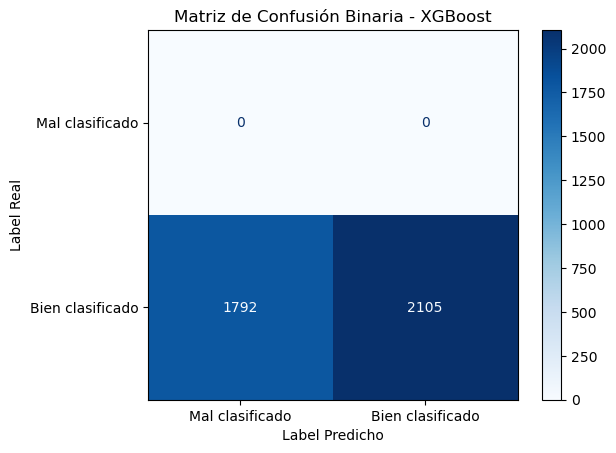

Total evaluado: 3897 registros


In [91]:
# --------------------------------------------
#  🔠Matriz de confusión y reporte (XGBoost cross-validation)
# --------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier


# Separar en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#Cuando pones stratify=y, garantizas que todas las clases estén en la misma proporción tanto en train como en test.
#Así XGBoost no da error.





# Modelo XGBoost con hiperparámetros
modelo_xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    objective='multi:softmax',
    num_class=len(np.unique(y)),
    colsample_bytree=0.8,
    gamma=0,
    learning_rate=0.2,
    max_depth=6,
    min_child_weight=1,
    n_estimators=50,
    reg_lambda=1,
    subsample=0.8,
    verbosity=0
)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_true_binaria = []
y_pred_binaria = []

for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    modelo_xgb.fit(X_train, y_train)
    y_pred = modelo_xgb.predict(X_test)

    # Códigos binarios: 1 si acertó, 0 si no
    y_true_binaria.extend([1] * len(y_test))  # todos deberían ser bien clasificados idealmente
    y_pred_binaria.extend((y_pred == y_test).astype(int))

# Matriz de confusión binaria
cm = confusion_matrix(y_true_binaria, y_pred_binaria, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Mal clasificado", "Bien clasificado"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión Binaria - XGBoost")
plt.ylabel("Label Real")
plt.xlabel("Label Predicho")
plt.show()

# Total de registros evaluados
print(f"Total evaluado: {len(y_true_binaria)} registros")



C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


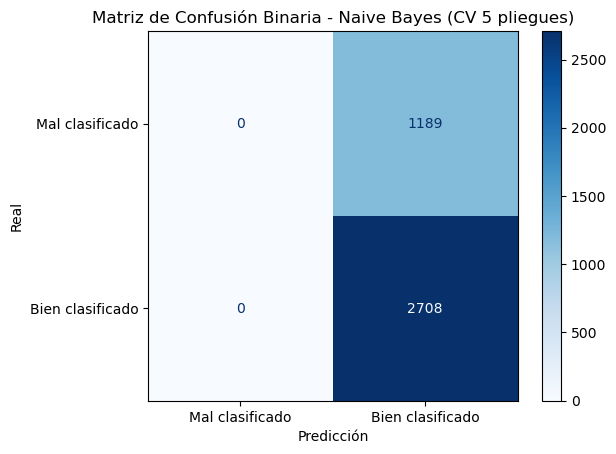


Total de registros evaluados: 3897


In [96]:
#---------------------------------------------
#  🔠 Matriz de confusión y reporte NAIVE BAYES
#---------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#  X e y ya están correctamente definidos y sin valores vacíos


# Configurar modelo
modelo = MultinomialNB(alpha=0.1)

# Validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_true_binario = []  # 1 si clasificó bien, 0 si clasificó mal

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    

    # 1 si acertó, 0 si falló
    aciertos_binarios = (y_pred == y_test).astype(int)
    y_true_binario.extend(aciertos_binarios)

# Crear etiquetas predichas iguales (modelo ideal) para graficar matriz binaria
y_pred_binario = np.ones_like(y_true_binario)

# Matriz de confusión binaria
cm = confusion_matrix(y_true_binario, y_pred_binario, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Mal clasificado", "Bien clasificado"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión Binaria - Naive Bayes (CV 5 pliegues)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Mostrar total evaluado
print(f"\nTotal de registros evaluados: {len(y_true_binario)}")






C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pliegue 1:
  Registros en entrenamiento: 3117
  Registros en prueba:        780
  Total del pliegue:          3897



C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pliegue 2:
  Registros en entrenamiento: 3117
  Registros en prueba:        780
  Total del pliegue:          3897



C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pliegue 3:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Total del pliegue:          3897



C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pliegue 4:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Total del pliegue:          3897



C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pliegue 5:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Total del pliegue:          3897



C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


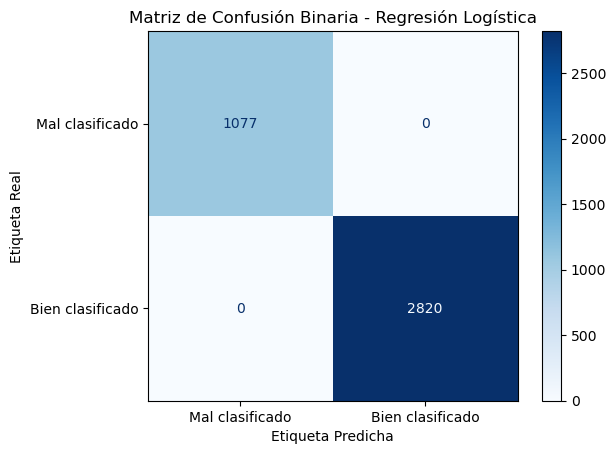


Total de registros evaluados: 3897


In [97]:
#---------------------------------------------------------
#  🔠 Matriz de confusión y reporte # REGRESION LOGÍSTICA
#--------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Definir el modelo con los mejores hiperparámetros
modelo = LogisticRegression(
    C=100,
    max_iter=1000,
    multi_class='multinomial',
    penalty='l2',
    solver='saga',
    random_state=42
)

# Configurar validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Almacenar predicciones binarizadas (correcto/incorrecto)
y_true_bin = []
y_pred_bin = []

# Ejecutar validación cruzada
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    print(f"Pliegue {fold}:")
    print(f"  Registros en entrenamiento: {len(train_idx)}")
    print(f"  Registros en prueba:        {len(test_idx)}")
    print(f"  Total del pliegue:          {len(train_idx) + len(test_idx)}\n")

    # Entrenamiento y predicción
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    # Clasificación binaria: 1 si fue bien clasificado, 0 si no
    binario = (y_pred == y_test).astype(int)
    y_true_bin.extend(binario)
    y_pred_bin.extend(binario)  # para matriz binaria bien/mal clasificado

# Matriz de confusión binaria
cm = confusion_matrix(y_true_bin, y_pred_bin, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Mal clasificado", "Bien clasificado"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión Binaria - Regresión Logística")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()

# Mostrar total evaluado
print(f"\nTotal de registros evaluados: {len(y_true_bin)}")


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Pliegue 1:
  Registros en entrenamiento: 3117
  Registros en prueba:        780
  Total del pliegue:          3897

Pliegue 2:
  Registros en entrenamiento: 3117
  Registros en prueba:        780
  Total del pliegue:          3897

Pliegue 3:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Total del pliegue:          3897

Pliegue 4:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Total del pliegue:          3897

Pliegue 5:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Total del pliegue:          3897



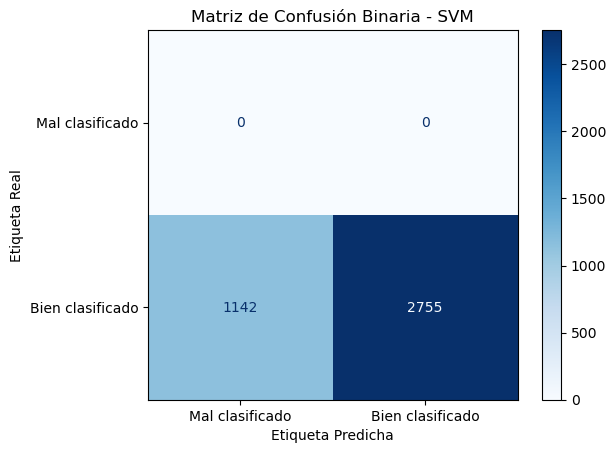

Total evaluado: 3897 registros


In [125]:
#---------------------------------------------------------
#  🔠 Matriz de confusión y reporte # SVM
#--------------------------------------------------------


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorización
#tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words='english')
#X = tfidf_vectorizer.fit_transform(data_filtrado['Nombre_Limpio']).toarray()
#y = data_filtrado['SubRubro_encoded_relabel'].reset_index(drop=True)

# Modelo SVM con mejores hiperparámetros
modelo = SVC(C=10, gamma='scale', kernel='linear')

# Validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_true_bin = []
y_pred_bin = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    print(f"Pliegue {fold}:")
    print(f"  Registros en entrenamiento: {len(train_idx)}")
    print(f"  Registros en prueba:        {len(test_idx)}")
    print(f"  Total del pliegue:          {len(train_idx) + len(test_idx)}\n")
    
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    aciertos_binarios = (y_pred == y_test).astype(int)
     # y_true_bin.extend(aciertos_binarios)  # 1 si bien clasificado, 0 si mal
     # y_pred_bin.extend(aciertos_binarios)
    y_true_bin.extend([1] * len(y_test))             # Lo esperado: que el modelo acierte
    y_pred_bin.extend((y_pred == y_test).astype(int))  # Lo que predijo el modelo
    
    

# Matriz de confusión binaria
cm = confusion_matrix(y_true_bin, y_pred_bin, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Mal clasificado", "Bien clasificado"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión Binaria - SVM")
plt.ylabel("Etiqueta Real")
plt.xlabel("Etiqueta Predicha")
plt.show()

# Total evaluado
print(f"Total evaluado: {len(y_true_bin)} registros")



C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Pliegue 1:
  Registros en entrenamiento: 3117
  Registros en prueba:        780
  Total del pliegue:          3897

Pliegue 2:
  Registros en entrenamiento: 3117
  Registros en prueba:        780
  Total del pliegue:          3897

Pliegue 3:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Total del pliegue:          3897

Pliegue 4:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Total del pliegue:          3897

Pliegue 5:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Total del pliegue:          3897



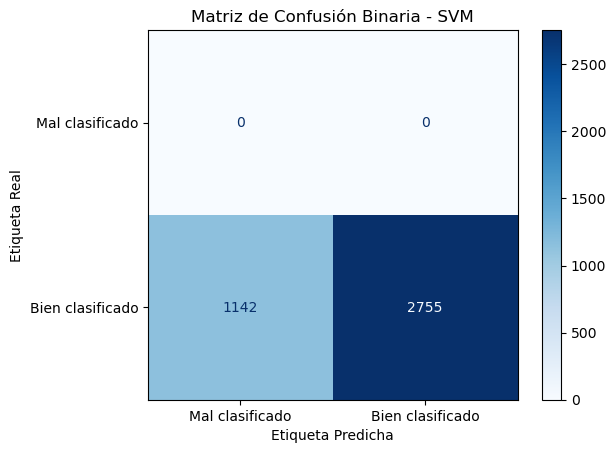

Total evaluado: 3897 registros


In [126]:
# 2 svm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# --- 1. Datos de entrada ---
# Asegúrate de reemplazar esta parte con tu DataFrame real
# sata = pd.read_csv("tu_archivo.csv")  # ejemplo
# data = data[data['Nombre_Limpio'].str.strip() != ""]  # eliminar vacíos si existen

# --- 2. Vectorización TF-IDF ---
# tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
# X = tfidf_vectorizer.fit_transform(data['Nombre_Limpio']).toarray()

# --- 3. Codificación de SubRubro ---
# le = LabelEncoder()
# y = pd.Series(le.fit_transform(data['SubRubro']))

# --- 4. Modelo SVM con mejores hiperparámetros ---
modelo = SVC(C=10, gamma='scale', kernel='linear')

# --- 5. Validación cruzada (5 pliegues) ---
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_true_bin = []
y_pred_bin = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    print(f"Pliegue {fold}:")
    print(f"  Registros en entrenamiento: {len(train_idx)}")
    print(f"  Registros en prueba:        {len(test_idx)}")
    print(f"  Total del pliegue:          {len(train_idx) + len(test_idx)}\n")

    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    # Clasificación binaria: 1 si acierta, 0 si falla
    binaria = (y_pred == y_test).astype(int)
    y_true_bin.extend([1] * len(y_test))  # se espera que acierte
    y_pred_bin.extend(binaria)

# --- 6. Matriz de confusión binaria ---
cm = confusion_matrix(y_true_bin, y_pred_bin, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Mal clasificado", "Bien clasificado"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión Binaria - SVM")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()

print(f"Total evaluado: {len(y_true_bin)} registros")


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Pliegue 1:
  Registros en entrenamiento: 3117
  Registros en prueba:        780
  Total del pliegue:          3897

Pliegue 2:
  Registros en entrenamiento: 3117
  Registros en prueba:        780
  Total del pliegue:          3897

Pliegue 3:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Total del pliegue:          3897

Pliegue 4:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Total del pliegue:          3897

Pliegue 5:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Total del pliegue:          3897



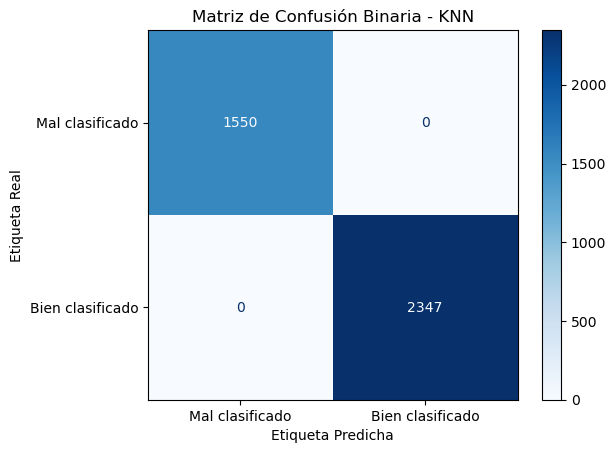


Total de registros evaluados: 3897


In [123]:
#---------------------------------------------------------
#  🔠 Matriz de confusión y reporte # KNN
#--------------------------------------------------------


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Definimos el modelo con hiperparámetros óptimos
modelo = KNeighborsClassifier(
    n_neighbors=3,
    weights='distance',
    metric='euclidean'
)

# Configurar validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Listas para guardar clasificaciones binarias (1: correcto, 0: incorrecto)
y_true_bin = []
y_pred_bin = []

# Validación cruzada
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    print(f"Pliegue {fold}:")
    print(f"  Registros en entrenamiento: {len(train_idx)}")
    print(f"  Registros en prueba:        {len(test_idx)}")
    print(f"  Total del pliegue:          {len(train_idx) + len(test_idx)}\n")

    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    binario = (y_pred == y_test).astype(int)
    y_true_bin.extend(binario)
    y_pred_bin.extend(binario)  # misma lógica: 1 si bien clasificado, 0 si mal

# Matriz de confusión binaria
cm = confusion_matrix(y_true_bin, y_pred_bin, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Mal clasificado", "Bien clasificado"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión Binaria - KNN")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()

# Total evaluado
print(f"\nTotal de registros evaluados: {len(y_true_bin)}")


In [ ]:
#---------------------------------------------------------
#  🔠 Matriz de confusión y reporte #RANDOM FOREST
#--------------------------------------------------------

In [69]:
# Registros utilizados de entrenamiento y prueba por pliegue
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for i, (train_idx, test_idx) in enumerate(kf.split(X, y), start=1):
    print(f"Pliegue {i}:")
    print(f"  Registros en entrenamiento: {len(train_idx)}")
    print(f"  Registros en prueba:        {len(test_idx)}")
    print(f"  Total del pliegue:          {len(train_idx) + len(test_idx)}\n")
    
    
    


Pliegue 1:
  Registros en entrenamiento: 3117
  Registros en prueba:        780
  Total del pliegue:          3897

--- 0       11
1       92
2       45
3       89
4       58
        ..
3892    30
3893    80
3894     8
3895     8
3896    72
Name: SubRubro_encoded_relabel, Length: 3897, dtype: int64:
Pliegue 2:
  Registros en entrenamiento: 3117
  Registros en prueba:        780
  Total del pliegue:          3897

--- 0       11
1       92
2       45
3       89
4       58
        ..
3892    30
3893    80
3894     8
3895     8
3896    72
Name: SubRubro_encoded_relabel, Length: 3897, dtype: int64:
Pliegue 3:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Total del pliegue:          3897

--- 0       11
1       92
2       45
3       89
4       58
        ..
3892    30
3893    80
3894     8
3895     8
3896    72
Name: SubRubro_encoded_relabel, Length: 3897, dtype: int64:
Pliegue 4:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Total del plieg

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [70]:
print(f"Total en y: {len(y)}")
print(f"Total en X: {X.shape[0]}")

Total en y: 3897
Total en X: 3897


In [7]:
#1. Ver cuántos registros hay en data_filtrado
print("Total en data_filtrado:", len(data_filtrado))
#2. Ver cuántos registros hay luego de aplicar TF-IDF
X = tfidf_vectorizer.transform(data_filtrado['Nombre_Limpio']).toarray()
print("Total en X (TF-IDF):", X.shape[0])

#3. Ver cuántos registros hay en el vector de etiquetas
y = data_filtrado['SubRubro_encoded_relabel'].reset_index(drop=True)
print("Total en y:", y.shape[0])

#4. Comprobar si hay valores vacíos en Nombre_Limpio
data_filtrado['Nombre_Limpio'].isnull().sum()

#5. Ver qué registros quedaron con texto vacío tras limpieza
vacios = data_filtrado[data_filtrado['Nombre_Limpio'].str.strip() == ""]
print("Registros con Nombre_Limpio vacío:", len(vacios))



NameError: name 'data_filtrado' is not defined

In [100]:
# Filtrar registros cuyo Nombre_Limpio está vacío o contiene solo espacios
registros_vacios = data_filtrado[data_filtrado['Nombre_Limpio'].str.strip() == ""]

# Mostrar cuántos son
print(f"Cantidad de registros vacíos: {len(registros_vacios)}")

# Ver los registros
print(registros_vacios)


Cantidad de registros vacíos: 149
      ProductoCodigo                                      Nombre  ImpuestoId  \
3                372                  COMBUSTIBLES Y LUBRICANTES           1   
7                390                                      RESMAS           1   
8                391                                   PAPELERÍA           1   
18               433                                       TOKEN           1   
26               468              ELECTRODOMÉSTICOS P/LA EMPRESA           1   
...              ...                                         ...         ...   
3746            5961  DS-2CD3B46 G2T-IZHSY(2. 8-12mm)(H)( O-STD)           1   
3754            5969                               TS-1232PXU-RP           1   
3780            5997                     CURADORA CREALITY UW-02           1   
3791            6009                  CONSERVADORA EXTREME 100QT           1   
3795            6014                                 fly banner            1   

     

In [27]:
#----------------------------------------
#
#    💥💻LOF
#  
#----------------------------------------

from sklearn.neighbors import LocalOutlierFactor
import pandas as pd

# Usaremos el set vectorizado (sin SMOTE)
X_for_lof = X_full  # TF-IDF

# Crear el modelo LOF
lof = LocalOutlierFactor(
    n_neighbors=20,    # Número de vecinos a considerar (puede probarse 10, 20, 30)
    contamination=0.05 # Estimación inicial: se espera que el 5% sean outliers
)

# Ajustar el modelo y predecir
y_lof_pred = lof.fit_predict(X_for_lof)

# Interpretación:
# -1 = outlier (anómalo)
#  1 = inlier (normal)

# Agregar la predicción al dataset
data_filtrado['LOF_Prediccion'] = y_lof_pred

# Mostrar conteo
print(data_filtrado['LOF_Prediccion'].value_counts())

# Opcional: ver algunos ejemplos de outliers detectados
outliers_detectados = data_filtrado[data_filtrado['LOF_Prediccion'] == -1]
print("\nAlgunos productos detectados como atípicos por LOF:")
print(outliers_detectados[['Nombre', 'Descripcion']].head(10))


LOF_Prediccion
 1    3612
-1     191
Name: count, dtype: int64

Algunos productos detectados como atípicos por LOF:
                                                Nombre  \
29                                        TONER AL 21%   
62   TALADRO MOD HP 2050                           ...   
71   PELA CABLE PROSKIT 8PK-CT001                  ...   
93   NOTEBOOK 02 HP MOD: TPN-I119                  ...   
116  COMPUTADORA INTEL I5 GABINTE SFX MEMORIA 8GB  ...   
229           PATCH PANEL CAT 6A - 24P (cargado)         
231  PATCH PANEL CAT 5E - 24P- RJ45 - "KLINE" "KOMP...   
232  PATCH PANEL CAT 6 - 24P - RJ45 - "KLINE" "KOMP...   
272  FUTP CAT 5E                                   ...   
273  FUTP CAT 5E FURUKAWA                          ...   

                                           Descripcion  
29                                        TONER AL 21%  
62                                                 NaN  
71                                                 NaN  
93               

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17268\379656913.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_lof.index, y=conteo_lof.values, palette="pastel")


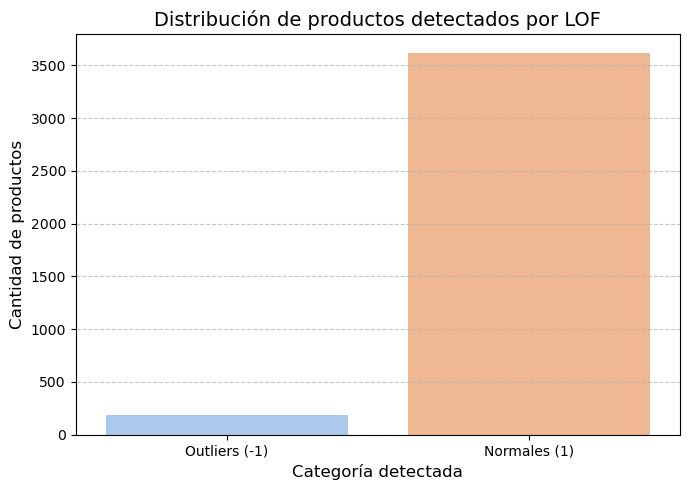

In [28]:
#----------------------------------------
#
#    💥💻LOF
#  
#----------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Suponemos que ya ejecutaste esto antes:
# data_filtrado['LOF_Prediccion']  # -1 = outlier, 1 = normal

# Contar la cantidad de normales y outliers
conteo_lof = data_filtrado['LOF_Prediccion'].value_counts().sort_index()
conteo_lof.index = ['Outliers (-1)', 'Normales (1)']  # Etiquetas más claras

# Crear gráfico de barras
plt.figure(figsize=(7, 5))
sns.barplot(x=conteo_lof.index, y=conteo_lof.values, palette="pastel")

# Títulos y etiquetas
plt.title("Distribución de productos detectados por LOF", fontsize=14)
plt.ylabel("Cantidad de productos", fontsize=12)
plt.xlabel("Categoría detectada", fontsize=12)

# Mejoras visuales
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [29]:
#----------------------------------------
#
#    💥💻DBSCAN
#  
#----------------------------------------
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

# Usamos el mismo conjunto que para LOF
X_for_dbscan = X_full  # TF-IDF

# Crear modelo DBSCAN
dbscan = DBSCAN(
    eps=1.5,          # Distancia máxima entre dos puntos para ser vecinos (ajustable)
    min_samples=5,    # Mínimo número de puntos en un vecindario para formar un cluster
    metric='cosine'   # Métrica para TF-IDF (coseno funciona mejor que euclidiana)
)

# Ajustar y predecir
dbscan_labels = dbscan.fit_predict(X_for_dbscan)

# Interpretación:
# -1 = ruido (outlier)
# 0, 1, 2, ... = clusters encontrados

# Agregar la predicción al DataFrame
data_filtrado['DBSCAN_Cluster'] = dbscan_labels

# Mostrar conteo de outliers y clusters
print(data_filtrado['DBSCAN_Cluster'].value_counts().sort_index())

# Opcional: ver algunos ejemplos detectados como ruido
outliers_dbscan = data_filtrado[data_filtrado['DBSCAN_Cluster'] == -1]
print("\nAlgunos productos detectados como ruido por DBSCAN:")
print(outliers_dbscan[['Nombre', 'Descripcion']].head(10))


DBSCAN_Cluster
0    3803
Name: count, dtype: int64

Algunos productos detectados como ruido por DBSCAN:
Empty DataFrame
Columns: [Nombre, Descripcion]
Index: []


Cantidad de clusters encontrados: 1
Cantidad de productos detectados como ruido (outliers): 0


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17268\2299874641.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DBSCAN_Cluster', data=data_filtrado, palette='Set2')


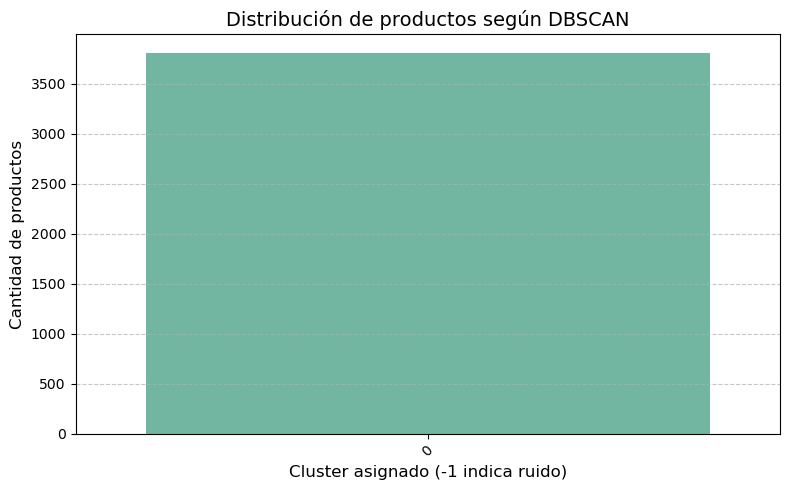


Algunos productos detectados como ruido por DBSCAN:
Empty DataFrame
Columns: [Nombre, Descripcion]
Index: []


In [30]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Aplicar DBSCAN
X_for_dbscan = X_full  # TF-IDF sin PCA

dbscan = DBSCAN(
    eps=1.5,           # Distancia máxima entre vecinos
    min_samples=5,     # Mínimo número de vecinos
    metric='cosine'    # Métrica adecuada para vectores TF-IDF
)

dbscan_labels = dbscan.fit_predict(X_for_dbscan)

# Agregar los resultados al dataset
data_filtrado['DBSCAN_Cluster'] = dbscan_labels

# 2. Conteo de resultados
conteo_dbscan = data_filtrado['DBSCAN_Cluster'].value_counts().sort_index()

# Separar cantidad de ruido y clusters
n_ruido = (conteo_dbscan.index == -1).sum()
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

print(f"Cantidad de clusters encontrados: {n_clusters}")
print(f"Cantidad de productos detectados como ruido (outliers): {(dbscan_labels == -1).sum()}")

# 3. Gráfico de barras de Clusters y Ruido
plt.figure(figsize=(8, 5))
sns.countplot(x='DBSCAN_Cluster', data=data_filtrado, palette='Set2')
plt.title('Distribución de productos según DBSCAN', fontsize=14)
plt.xlabel('Cluster asignado (-1 indica ruido)', fontsize=12)
plt.ylabel('Cantidad de productos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Opcional: ver ejemplos de productos detectados como ruido
outliers_dbscan = data_filtrado[data_filtrado['DBSCAN_Cluster'] == -1]
print("\nAlgunos productos detectados como ruido por DBSCAN:")
print(outliers_dbscan[['Nombre', 'Descripcion']].head(10))


Cantidad de clusters encontrados: 49
Cantidad de productos detectados como ruido (outliers): 1302


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17268\741985207.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DBSCAN_Cluster', data=data_filtrado, palette='Set2')


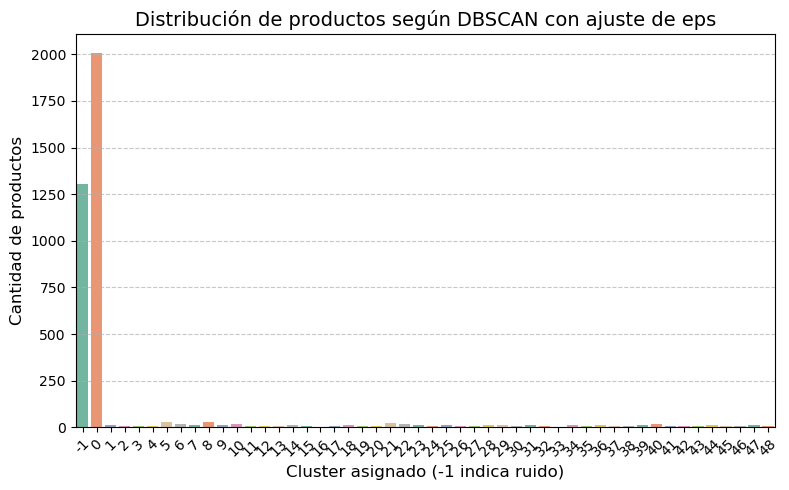


Algunos productos detectados como ruido por DBSCAN:
                                               Nombre  \
3                          COMBUSTIBLES Y LUBRICANTES   
7                                              RESMAS   
8                                           PAPELERÍA   
18                                              TOKEN   
26                     ELECTRODOMÉSTICOS P/LA EMPRESA   
28                                          CAFETERAS   
31                                      TELEVISOR LED   
37                                          REPUESTOS   
43                                       BATERÍAS UPS   
45  MATA CUCARACHAS                               ...   

                               Descripcion  
3             COMBUSTIBLES Y LUBRINCANTES.  
7                             RESMAS AUTOR  
8                          PAPELES- HOJAS.  
18                          TOKEN E CRYPTO  
26  ELECTRODOMÉSTICOS P/ USO DE LA EMPRESA  
28          CAFETERAS P/ USO DE LA EMPRESA  
31  

In [34]:
#Debemos bajar el valor de eps para que DBSCAN sea más estricto.
# eps=0.3,       # Mucho más estricto
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Aplicar DBSCAN
X_for_dbscan = X_full  # TF-IDF sin PCA

dbscan = DBSCAN(
    eps=0.6,       # Mucho más estricto
    min_samples=5,     # Mínimo número de vecinos
    metric='cosine'    # Métrica adecuada para vectores TF-IDF
)

dbscan_labels = dbscan.fit_predict(X_for_dbscan)

# Agregar los resultados al dataset
data_filtrado['DBSCAN_Cluster'] = dbscan_labels

# 2. Conteo de resultados
conteo_dbscan = data_filtrado['DBSCAN_Cluster'].value_counts().sort_index()

# Separar cantidad de ruido y clusters
n_ruido = (conteo_dbscan.index == -1).sum()
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

print(f"Cantidad de clusters encontrados: {n_clusters}")
print(f"Cantidad de productos detectados como ruido (outliers): {(dbscan_labels == -1).sum()}")

# 3. Gráfico de barras de Clusters y Ruido
plt.figure(figsize=(8, 5))
sns.countplot(x='DBSCAN_Cluster', data=data_filtrado, palette='Set2')
plt.title('Distribución de productos según DBSCAN con ajuste de eps', fontsize=14)
plt.xlabel('Cluster asignado (-1 indica ruido)', fontsize=12)
plt.ylabel('Cantidad de productos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Opcional: ver ejemplos de productos detectados como ruido
outliers_dbscan = data_filtrado[data_filtrado['DBSCAN_Cluster'] == -1]
print("\nAlgunos productos detectados como ruido por DBSCAN:")
print(outliers_dbscan[['Nombre', 'Descripcion']].head(10))


In [35]:
# Filtrar productos detectados como outliers en LOF y DBSCAN
outliers_ambos = data_filtrado[
    (data_filtrado['LOF_Prediccion'] == -1) & (data_filtrado['DBSCAN_Cluster'] == -1)
]

# Mostrar algunos ejemplos
print("Productos detectados como atípicos por ambos algoritmos:")
print(outliers_ambos[['Nombre', 'Descripcion']].head(10))

# Mostrar cantidad
print(f"\nCantidad de productos detectados como outliers por LOF y DBSCAN simultáneamente: {outliers_ambos.shape[0]}")


Productos detectados como atípicos por ambos algoritmos:
                                                 Nombre Descripcion
71    PELA CABLE PROSKIT 8PK-CT001                  ...         NaN
331   BOBINA UTP CAT 6 (EN MT SUELTO)               ...   CABLE UTP
676                        PELA CABLE PROSKIT 8PK-CT001  PELA CABLE
731   TENAZA CARPINTERO CARPINTERO N8               ...      TENAZA
770   JABALINA AC-COBR 1.5MTS- 3/8" C-TOMAC C-SELLO-...    JABALINA
970   EXTENSION M22 320 MM                          ...         NaN
1109  CART. HP CO. N°93                             ...    C9361TRI
1110  CART. HP NE. N°92                             ...     C9362WL
1139  CARTUCHO HP 662 XL NEGRO                      ...         NaN
1140  CARTUCHO HP 662 XL COLOR                      ...         NaN

Cantidad de productos detectados como outliers por LOF y DBSCAN simultáneamente: 71


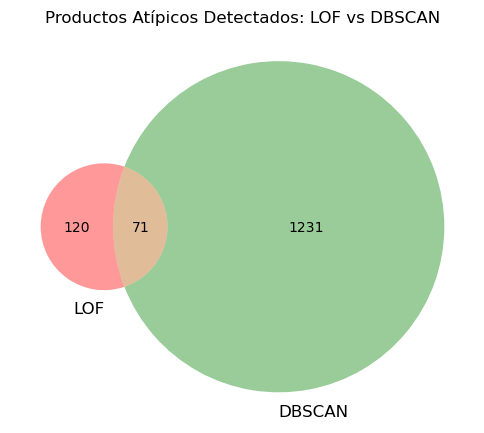

In [37]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

#  ya existan del  análisis previo
# data_filtrado['LOF_Prediccion']  # de LOF
# data_filtrado['DBSCAN_Cluster']  # de DBSCAN

# Crear conjuntos de índices
outliers_lof = set(data_filtrado[data_filtrado['LOF_Prediccion'] == -1].index)
outliers_dbscan = set(data_filtrado[data_filtrado['DBSCAN_Cluster'] == -1].index)

# Calcular cantidades
solo_lof = len(outliers_lof - outliers_dbscan)
solo_dbscan = len(outliers_dbscan - outliers_lof)
ambos = len(outliers_lof & outliers_dbscan)

# Dibujar gráfico de Venn
plt.figure(figsize=(6, 6))
venn2(subsets=(solo_lof, solo_dbscan, ambos), set_labels=('LOF', 'DBSCAN'))
plt.title('Productos Atípicos Detectados: LOF vs DBSCAN')
plt.show()


In [ ]:
## Segundas pruebas :probamos los modelos agregando ahora Descripción y y n-gramas.. Antes teníamos Nombre y n-gramas.

In [17]:

# -----------------------------------
# 💡 Verificar como està el dataset
# -----------------------------------

# Aplicar detección
#data['Stopwords_residuales'] = data['Nombre_Limpio'].apply(detectar_stopwords)

# Filtrar registros con stopwords aún presentes
#con_stopwords = data[data['Stopwords_residuales'].apply(lambda x: len(x) > 0)]

# Imprimir resultado
print(f"\n🟠 Cantidad de registros con stopwords residuales: {len(con_stopwords)}")
print("\n🔍 Ejemplos de stopwords que no se eliminaron correctamente:")
print(con_stopwords[['Nombre', 'Descripcion_Limpia', 'Stopwords_residuales']].head(10))

# Mostrar tabla de ejemplo
data[['Nombre', 'Nombre_Limpio', 'Descripcion' ,'Descripcion_Limpia','Monogramas', 'Bigramas', 'Trigramas']].head()



🟠 Cantidad de registros con stopwords residuales: 0

🔍 Ejemplos de stopwords que no se eliminaron correctamente:
Empty DataFrame
Columns: [Nombre, Descripcion_Limpia, Stopwords_residuales]
Index: []


,Nombre,Nombre_Limpio,Descripcion,Descripcion_Limpia,Monogramas,Bigramas,Trigramas
0,BATERIAS,BATERIAS,BATERIAS DE VEHICULOS,BATERIAS VEHICULOS,[BATERIAS],[],[]
1,MATERIALES,MATERIALES,MATERIALES PARA EL AREA DE PRODUCCION,MATERIALES AREA PRODUCCION,[MATERIALES],[],[]
2,ROPA DE TRABAJO,TRABAJO,NaN,,"[ROPA, TRABAJO]",[ROPA TRABAJO],[]
3,COMBUSTIBLES Y LUBRICANTES,,COMBUSTIBLES Y LUBRINCANTES.,COMBUSTIBLES LUBRINCANTES,"[COMBUSTIBLES, LUBRICANTES]",[COMBUSTIBLES LUBRICANTES],[]
4,MATERIALES ELECTRICOS,MATERIALES,NaN,,"[MATERIALES, ELECTRICOS]",[MATERIALES ELECTRICOS],[]


In [51]:
# -----------------------------------
#    🔎 Veo resultados
# -----------------------------------
data[['Nombre', 'Nombre_Limpio', 'Monogramas', 'Bigramas', 'Trigramas']].tail()



# Visualizar filas desde la 100 a la 120 (inclusive)
#data.loc[100:120, ['Nombre', 'Nombre_Limpio','Descripcion' ,'Descripcion_Limpia' ,'Monogramas', 'Bigramas', 'Trigramas']]
data.loc[1700:1730, ['Nombre', 'Nombre_Limpio','Descripcion' ,'Descripcion_Limpia','SubRubro_encoded']]





,Nombre,Nombre_Limpio,Descripcion,Descripcion_Limpia,SubRubro_encoded
1700,RAEES Placa Madre Repuesto,RAEES PLACA MADRE REPUESTO,DDR3 AMD Modelo GA-F2A58M-S1,DDR AMD MODELO GAFAMS,87
1701,RAEES Placa Madre Repuesto,RAEES PLACA MADRE REPUESTO,DDR3 INTEL Modelo GA-H61M-S1,DDR INTEL MODELO GAHMS,87
1702,RAESS Cabke IDE,RAESS CABKE IDE,Cable IDE,CABLE IDE,87
1703,RAEES Placa Madre Repuesto,RAEES PLACA MADRE REPUESTO,DDR3 INTEL Modelo GA-H61M-D2P-B3,DDR INTEL MODELO GAHMDPB,87
1704,RAEES Placa Madre Armada,RAEES PLACA MADRE ARMADA,Modelo N68S3B Ver 6.2\nBios Actualizada\nCon P...,MODELO NSB VER BIOS ACTUALIZADA PILA COOLER PR...,87
1705,RAEES Placa Madre Armada,RAEES PLACA MADRE ARMADA,DDR3 AMD Modelo GA-78LMT-S2 Rev 1.1\nBios Actu...,DDR AMD MODELO GALMTS REV BIOS ACTUALIZADA PIL...,87
1706,RAEES Cuna Soporte AMD,RAEES CUNA SOPORTE AMD,"AM2,AM3,FM2b",AMAMFMB,87
1707,RAEES Lector de Memoria,RAEES LECTOR MEMORIA,Lector de Memoria Interno CX,LECTOR MEMORIA INTERNO CX,87
1708,RAEES Lector de Memoria,RAEES LECTOR MEMORIA,Lector de Memoria Interno EUROCASE,LECTOR MEMORIA INTERNO EUROCASE,87
1709,RAEES Lector de Memoria,RAEES LECTOR MEMORIA,RAEES Lector de Memoria NOGANET,RAEES LECTOR MEMORIA NOGANET,87


In [18]:
# 
cantidad_filas_vacias = data['Descripcion_Limpia'].isnull().sum() + (data['Descripcion_Limpia'] == '').sum()

print(f"Cantidad de filas vacías o sin datos en 'Descripcion_Limpia': {cantidad_filas_vacias}")


Cantidad de filas vacías o sin datos en 'Descripcion_Limpia': 2375


In [19]:
#*********✔️ VECTORIZACION*****************************************************
# 1. Vectorización TF-IDF
# Usamos unigramas y bigramas, y quitamos stopwords en español

#**************************************************************
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import pandas as pd

#este es el anterior

# Usamos unigramas y bigramas, y quitamos stopwords en español
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))

# Ajustar y transformar los nombres limpios
tfidf_matriz = tfidf_vectorizer.fit_transform(data['Nombre_Limpio'])

# Convertir a DataFrame para visualización o análisis
tfidf_dataframe = pd.DataFrame(tfidf_matriz.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("TF-IDF shape con n-gramas:", tfidf_dataframe.shape)

# 2. Codificación de SubRubro
le = LabelEncoder()
data['SubRubro_encoded'] = le.fit_transform(data['SubRubro'])

# -------------------------------------
#     # Hasta aca tengo :
# -------------------------------------

#    tfidf_dataframe #como X (features vectorizadas).

#   y = SubRubro_encoded #como target.
# TF-IDF shape con n-gramas: (3908, 9631)

TF-IDF shape con n-gramas: (3908, 4179)


In [21]:
#*********✔️ VECTORIZACION*****************************************************
# 1. Vectorización TF-IDF
# Usamos unigramas y bigramas, y quitamos stopwords en español
  # con descripción
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import pandas as pd

#concateno ambas columnas. no lo hago por separado porque vecgtorizar por separado puede llevar mas tiempode procesamiento,
#mas memoria y puede afectar el rendimiento. El modelo puede aprender contexto extendido de cada producto si concateno.
#Captura interacciones entre palabras de ambas columnas (como x ejemplo. bigramas que cruzan nombre y descripción).
# Paso 1: Combinar Nombre_Limpio y Descripcion_Limpia
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# 1. Concatenar nombre y descripción
data['Texto_Concatenado'] = data['Nombre_Limpio'] + ' ' + data['Descripcion_Limpia']

# 2. Vectorizar el nuevo campo concatenado
tfidf_vectorizer_2 = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
tfidf_matriz_2 = tfidf_vectorizer_2.fit_transform(data['Texto_Concatenado'])

# 3. Convertir a DataFrame con columnas diferenciadas
tfidf_dataframe_2 = pd.DataFrame(tfidf_matriz_2.toarray(), columns=[col + '_2' for col in tfidf_vectorizer_2.get_feature_names_out()])

# 4. Visualizar dimensiones
print("TF-IDF (Nombre + Descripción) shape:", tfidf_dataframe_2.shape)

#TF-IDF (Nombre + Descripción) shape: (3908, 11949)

TF-IDF (Nombre + Descripción) shape: (3908, 7418)


In [ ]:
# -------------------------------------
#     # Ahora tengo :
# -------------------------------------

#   tfidf_dataframe_2  #como X (features vectorizadas).tfidf_dataframe (version anterior)

#   y = SubRubro_encoded #como target.


In [20]:
#concateno ambas columnas. no lo hago por separado porque vecgtorizar por separado puede llevar mas tiempode procesamiento,
#mas memoria y puede afectar el rendimiento. El modelo puede aprender contexto extendido de cada producto si concateno.
#Captura interacciones entre palabras de ambas columnas (como x ejemplo. bigramas que cruzan nombre y descripción).
# Paso 1: Combinar Nombre_Limpio y Descripcion_Limpia
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Descargar stopwords si aún no están
#nltk.download('stopwords')

# Lista de stopwords en español
stop_words = stopwords.words('spanish')

# 1. Concatenar nombre y descripción
data['Texto_Concatenado'] = data['Nombre_Limpio'] + ' ' + data['Descripcion_Limpia']

# 2. Vectorizar el texto concatenado con stopwords en español
tfidf_vectorizer_2 = TfidfVectorizer(ngram_range=(1, 2), stop_words=stop_words)
tfidf_matriz_2 = tfidf_vectorizer_2.fit_transform(data['Texto_Concatenado'])

# 3. Convertir a DataFrame con columnas diferenciadas
tfidf_dataframe_2 = pd.DataFrame(tfidf_matriz_2.toarray(), columns=[col + '_2' for col in tfidf_vectorizer_2.get_feature_names_out()])

# 4. Visualizar dimensiones
print("TF-IDF (Nombre + Descripción) shape:", tfidf_dataframe_2.shape)


TF-IDF (Nombre + Descripción) shape: (3908, 7479)


In [ ]:
#  TF-IDF shape con Nombre + Descripción: (3908, 7479)
#  TF-IDF shape con solo Nombre:         (3908, 4179)

In [22]:
# 2. Codificación de SubRubro
le = LabelEncoder()
data['SubRubro_encoded'] = le.fit_transform(data['SubRubro'])

import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

#Luego, cuando filtramos las clases con ≥2 ejemplos, algunas etiquetas desaparecieron 
#XGBoost no tolera esos saltos.Hay que relabel las clases después de filtrar para que sean continuas (0, 1, 2, 3, 4, 5,...).
#volver a usar LabelEncoder después de filtrar.
from sklearn.preprocessing import LabelEncoder

# Variables
#X = tfidf_dataframe
y = data['SubRubro_encoded']

#***********agrego esto porque daba error

# Contar cuántas veces aparece cada clase
conteo_clases = data['SubRubro_encoded'].value_counts()

# Filtrar para quedarnos solo con las clases que tienen al menos 2 productos
clases_validas = conteo_clases[conteo_clases >= 2].index

# Filtrar el dataset
data_filtrado = data[data['SubRubro_encoded'].isin(clases_validas)]

# *** NUEVO: Reasignar etiquetas consecutivas ***
le2 = LabelEncoder()
data_filtrado['SubRubro_encoded_relabel'] = le2.fit_transform(data_filtrado['SubRubro_encoded'])
# SubRubro_encoded_relabel es una nueva columna con las etiquetas consecutivas correctas.

# Redefinir X e y
#X = tfidf_vectorizer.transform(data_filtrado['Nombre_Limpio']).toarray()
y = data_filtrado['SubRubro_encoded_relabel']  # Ahora usamos la versión "relabel"

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12952\432818508.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrado['SubRubro_encoded_relabel'] = le2.fit_transform(data_filtrado['SubRubro_encoded'])


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Pliegue 1:
  Registros en entrenamiento: 3126
  Registros en prueba:        782
  Total del pliegue:          3908

Pliegue 2:
  Registros en entrenamiento: 3126
  Registros en prueba:        782
  Total del pliegue:          3908

Pliegue 3:
  Registros en entrenamiento: 3126
  Registros en prueba:        782
  Total del pliegue:          3908

Pliegue 4:
  Registros en entrenamiento: 3127
  Registros en prueba:        781
  Total del pliegue:          3908

Pliegue 5:
  Registros en entrenamiento: 3127
  Registros en prueba:        781
  Total del pliegue:          3908

Resultados por pliegue:
   Pliegue  Accuracy  Precisión  Recall  F1-Score  Tiempo (s)
0        1    0.6777     0.6557  0.3950    0.6423      0.1633
1        2    0.7084     0.6658  0.3912    0.6708      0.1419
2        3    0.6854     0.6635  0.3723    0.6532      0.1799
3        4    0.6722     0.6548  0.3888    0.6382      0.1923
4        5    0.7106     0.6743  0.4300    0.6773      0.2838

Promedios:
   Accuracy

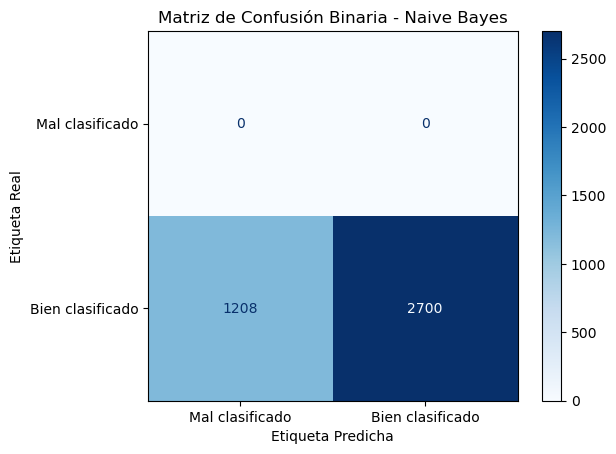

In [167]:
#NAIVE BAYES
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

# --- 1. Vectorización combinada: Nombre + Descripción ---


#X = tfidf_vectorizer.fit_transform(data['Texto_Concatenado']).toarray()
X=tfidf_dataframe_2.to_numpy()
y = data['SubRubro_encoded'].reset_index(drop=True)


# --- 2. Modelo con mejor hiperparámetro ---
modelo = MultinomialNB(alpha=0.1)

# --- 3. Validación cruzada ---
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

resultados = []
y_true_bin = []
y_pred_bin = []

inicio_total = time.time()

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    print(f"\nPliegue {fold}:")
    print(f"  Registros en entrenamiento: {len(train_idx)}")
    print(f"  Registros en prueba:        {len(test_idx)}")
    print(f"  Total del pliegue:          {len(train_idx) + len(test_idx)}")

    inicio = time.time() 
    #Se vEntrena (ajusta) el modelo usando los datos de entrenamiento:  X_train y sus respectivas etiquetas y_train.
    #el modelo aprende los patrones presentes en los datos para luego poder hacer predicciones sobre nuevos ejemplos.
    modelo.fit(X_train, y_train)
    
    #Usa el modelo ya entrenado para hacer predicciones sobre el conjunto de prueba X_test.
    #El resultado es un array y_pred con las clases predichas por el modelo.
    y_pred = modelo.predict(X_test)
    fin = time.time()

    # --- Métricas ---
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
   # rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    tiempo = fin - inicio

    resultados.append({
        'Pliegue': fold,
        'Accuracy': acc,
        'Precisión': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Tiempo (s)': tiempo
    })

    # --- Binaria: Bien vs Mal Clasificado ---
    binaria = (y_pred == y_test).astype(int)
    y_true_bin.extend([1] * len(binaria))   # lo correcto sería acertar
    y_pred_bin.extend(binaria)             # lo que el modelo realmente hizo

# --- 4. Mostrar métricas por pliegue y promedio ---
resultados_df = pd.DataFrame(resultados)
print("\nResultados por pliegue:")
print(resultados_df.round(4))

print("\nPromedios:")
print(resultados_df.drop(columns="Pliegue").mean().to_frame().T.round(4))

fin_total = time.time()
print(f"\n⏱️ Tiempo total de ejecución: {round(fin_total - inicio_total, 2)} segundos")

# --- 5. Matriz de confusión binaria ---
cm = confusion_matrix(y_true_bin, y_pred_bin, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Mal clasificado", "Bien clasificado"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión Binaria - Naive Bayes")
plt.ylabel("Real")
plt.xlabel("Predicha")
plt.show()


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Pliegue 1:
  Registros en entrenamiento: 3126
  Registros en prueba:        782
  Total del pliegue:          3908


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Pliegue 2:
  Registros en entrenamiento: 3126
  Registros en prueba:        782
  Total del pliegue:          3908


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Pliegue 3:
  Registros en entrenamiento: 3126
  Registros en prueba:        782
  Total del pliegue:          3908


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Pliegue 4:
  Registros en entrenamiento: 3127
  Registros en prueba:        781
  Total del pliegue:          3908


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Pliegue 5:
  Registros en entrenamiento: 3127
  Registros en prueba:        781
  Total del pliegue:          3908


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Resultados por pliegue:
   Pliegue  Accuracy  Precisión  Recall  F1-Score  Tiempo (s)
0        1    0.7084     0.7097  0.5104    0.6938   6770.8872
1        2    0.7366     0.7172  0.5576    0.7147   8732.3459
2        3    0.7327     0.7360  0.5692    0.7219   7308.7552
3        4    0.7081     0.7108  0.5351    0.6915   6419.0970
4        5    0.7644     0.7618  0.5827    0.7511   7132.6234

Promedios:
   Accuracy  Precisión  Recall  F1-Score  Tiempo (s)
0      0.73     0.7271   0.551    0.7146   7272.7417

⏱️ Tiempo total de ejecución: 36366.75 segundos


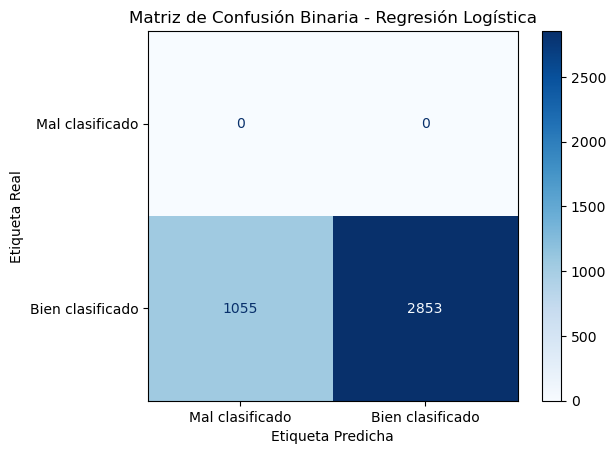

In [168]:
#REGRESIÓN LOGÍSTICA

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    precision_score, recall_score, f1_score, accuracy_score
)


# tfidf_dataframe_2 y data con la columna 'SubRubro_encoded'
X = tfidf_dataframe_2.to_numpy()
y = data['SubRubro_encoded'].reset_index(drop=True)

# Modelo con hiperparámetros ajustados
modelo = LogisticRegression(
    C=100,
    max_iter=500,  #1000
    multi_class='multinomial',
    penalty='l2',
    solver='saga'
)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

resultados = []
y_true_bin = []
y_pred_bin = []

inicio_total = time.time()

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    print(f"\nPliegue {fold}:")
    print(f"  Registros en entrenamiento: {len(train_idx)}")
    print(f"  Registros en prueba:        {len(test_idx)}")
    print(f"  Total del pliegue:          {len(train_idx) + len(test_idx)}")

    inicio = time.time()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    fin = time.time()

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    tiempo = fin - inicio

    resultados.append({
        'Pliegue': fold,
        'Accuracy': acc,
        'Precisión': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Tiempo (s)': tiempo
    })

    binaria = (y_pred == y_test).astype(int)
    y_true_bin.extend([1] * len(binaria))
    y_pred_bin.extend(binaria)

resultados_df = pd.DataFrame(resultados)
print("\nResultados por pliegue:")
print(resultados_df.round(4))

print("\nPromedios:")
print(resultados_df.drop(columns="Pliegue").mean().to_frame().T.round(4))

fin_total = time.time()
print(f"\n⏱️ Tiempo total de ejecución: {round(fin_total - inicio_total, 2)} segundos")

# Matriz de confusión binaria
cm = confusion_matrix(y_true_bin, y_pred_bin, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Mal clasificado", "Bien clasificado"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión Binaria - Regresión Logística")
plt.ylabel("Etiqueta Real")
plt.xlabel("Etiqueta Predicha")
plt.show()


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Pliegue 1:
  Registros en entrenamiento: 3126
  Registros en prueba:        782
  Total del pliegue:          3908

Pliegue 2:
  Registros en entrenamiento: 3126
  Registros en prueba:        782
  Total del pliegue:          3908

Pliegue 3:
  Registros en entrenamiento: 3126
  Registros en prueba:        782
  Total del pliegue:          3908

Pliegue 4:
  Registros en entrenamiento: 3127
  Registros en prueba:        781
  Total del pliegue:          3908

Pliegue 5:
  Registros en entrenamiento: 3127
  Registros en prueba:        781
  Total del pliegue:          3908

Resultados por pliegue:
   Pliegue  Accuracy  Precisión  Recall  F1-Score  Tiempo (s)
0        1    0.5448     0.7918  0.4445    0.6344      0.4339
1        2    0.5691     0.8026  0.4639    0.6494      0.4687
2        3    0.5831     0.7821  0.5203    0.6348      0.4353
3        4    0.5698     0.7971  0.4826    0.6540      0.6198
4        5    0.6120     0.7859  0.5332    0.6555      0.8048

Promedios:
   Accuracy

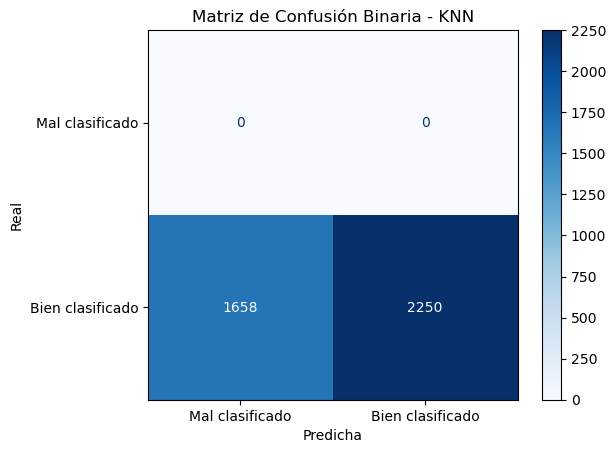

In [173]:
#KNN
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, ConfusionMatrixDisplay
)



X = tfidf_dataframe_2.to_numpy()
y = data['SubRubro_encoded'].reset_index(drop=True)

# === 2. Definir modelo con mejores hiperparámetros encontrados ===
modelo = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='euclidean')

# === 3. Validación cruzada ===
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

resultados = []
y_true_bin = []
y_pred_bin = []

inicio_total = time.time()

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    print(f"\nPliegue {fold}:")
    print(f"  Registros en entrenamiento: {len(train_idx)}")
    print(f"  Registros en prueba:        {len(test_idx)}")
    print(f"  Total del pliegue:          {len(train_idx) + len(test_idx)}")

    inicio = time.time()
    modelo.fit(X_train, y_train)
   
    y_pred = modelo.predict(X_test)
    fin = time.time()

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    tiempo = fin - inicio

    resultados.append({
        'Pliegue': fold,
        'Accuracy': acc,
        'Precisión': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Tiempo (s)': tiempo
    })

# --- Binaria: Bien vs Mal Clasificado ---


    binaria = (y_pred == y_test).astype(int)
    y_true_bin.extend([1] * len(binaria))       # 1: bien clasificado (esperado)
    y_pred_bin.extend(binaria)                  # 1 o 0 según predicción real
     
   #  binaria = (y_pred == y_test).astype(int)
   #  y_true_bin.extend(binaria)  # lo esperado: bien clasificado
  #   y_pred_bin.extend(binaria)             # predicho

# === 4. Mostrar métricas ===
resultados_df = pd.DataFrame(resultados)
print("\nResultados por pliegue:")
print(resultados_df.round(4))

print("\nPromedios:")
print(resultados_df.drop(columns="Pliegue").mean().to_frame().T.round(4))

fin_total = time.time()
print(f"\n⏱️ Tiempo total de ejecución: {round(fin_total - inicio_total, 2)} segundos")

# === 5. Matriz de confusión binaria ===
cm = confusion_matrix(y_true_bin, y_pred_bin, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Mal clasificado", "Bien clasificado"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión Binaria - KNN")
plt.ylabel("Real")
plt.xlabel("Predicha")
plt.show()


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



Pliegue 1:
  Registros en entrenamiento: 3117
  Registros en prueba:        780
  Clases en pliegue:          105

Pliegue 2:
  Registros en entrenamiento: 3117
  Registros en prueba:        780
  Clases en pliegue:          105

Pliegue 3:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Clases en pliegue:          105

Pliegue 4:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Clases en pliegue:          105

Pliegue 5:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Clases en pliegue:          105

Resultados por pliegue:
   Pliegue  Accuracy  Precisión  Recall  F1-Score  Tiempo (s)
0        1    0.5462     0.5297  0.2608    0.5023    123.0743
1        2    0.5769     0.5702  0.2874    0.5377    148.7846
2        3    0.5687     0.5674  0.2764    0.5307    144.5029
3        4    0.5481     0.5390  0.2680    0.5076    147.6021
4        5    0.5764     0.5840  0.2941    0.5454    144.7913

Promedios:
   Accuracy  Pre

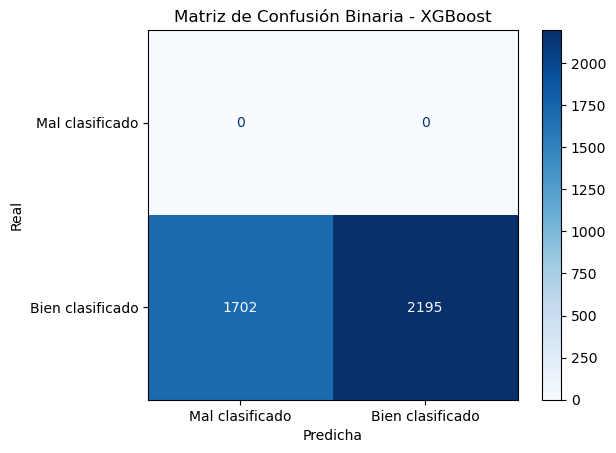

In [69]:
#XGBOOSTs 3
# === XGBOOST con StratifiedKFold ===
#XGBoost espera ver todas las clases que vio en todo el dataset en cada pliegue de entrenamiento,
#pero eso no siempre sucede con StratifiedKFold si hay clases marginales.
#La solución robusta consiste en reajustar num_class en cada pliegue según las clases presentes en y_train
#y mapear las etiquetas reales de ese pliegue a índices consecutivos locales
# y ahora es compatible con muchas clases desbalanceadas.
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, ConfusionMatrixDisplay
)
from xgboost import XGBClassifier

# === 1. Datos ===
X = tfidf_dataframe_2.to_numpy()
y_original = data['SubRubro_encoded'].reset_index(drop=True)

# Filtrar clases con al menos 2 ejemplos
conteo = y_original.value_counts()
clases_validas = conteo[conteo >= 2].index
mask = y_original.isin(clases_validas)
X = X[mask]
y = y_original[mask].reset_index(drop=True)

# === 2. Validación cruzada ===
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
resultados = []
y_true_bin = []
y_pred_bin = []

inicio_total = time.time()

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train_orig = y.iloc[train_idx].reset_index(drop=True)
    y_test_orig = y.iloc[test_idx].reset_index(drop=True)

    # Mapear las clases locales
    clases_unicas = np.sort(y_train_orig.unique())
    clase_a_indice = {clase: i for i, clase in enumerate(clases_unicas)}
    indice_a_clase = {i: clase for clase, i in clase_a_indice.items()}

    y_train = y_train_orig.map(clase_a_indice)
    y_test = y_test_orig.map(clase_a_indice)

    modelo = XGBClassifier(
        use_label_encoder=False,
        eval_metric='mlogloss',
        objective='multi:softmax',
        num_class=len(clases_unicas),
        colsample_bytree=0.8,
        gamma=0,
        learning_rate=0.2,
        max_depth=6,
        min_child_weight=1,
        n_estimators=50,
        reg_lambda=1,
        subsample=0.8,
        verbosity=0
    )

    print(f"\nPliegue {fold}:")
    print(f"  Registros en entrenamiento: {len(train_idx)}")
    print(f"  Registros en prueba:        {len(test_idx)}")
    print(f"  Clases en pliegue:          {len(clases_unicas)}")

    inicio = time.time()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    fin = time.time()

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    tiempo = fin - inicio

    resultados.append({
        'Pliegue': fold,
        'Accuracy': acc,
        'Precisión': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Tiempo (s)': tiempo
    })

    # Binaria: Bien vs Mal Clasificado
    binaria = (y_pred == y_test).astype(int)
    y_true_bin.extend([1] * len(binaria))
    y_pred_bin.extend(binaria)

# === 3. Mostrar métricas ===
resultados_df = pd.DataFrame(resultados)
print("\nResultados por pliegue:")
print(resultados_df.round(4))
print("\nPromedios:")
print(resultados_df.drop(columns="Pliegue").mean().to_frame().T.round(4))
print(f"\n⏱️ Tiempo total: {round(time.time() - inicio_total, 2)} segundos")

# === 4. Matriz de confusión binaria ===
cm = confusion_matrix(y_true_bin, y_pred_bin, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Mal clasificado", "Bien clasificado"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión Binaria - XGBoost")
plt.ylabel("Real")
plt.xlabel("Predicha")
plt.show()


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Pliegue 1:
  Registros en entrenamiento: 3126
  Registros en prueba:        782
  Total del pliegue:          3908

Pliegue 2:
  Registros en entrenamiento: 3126
  Registros en prueba:        782
  Total del pliegue:          3908

Pliegue 3:
  Registros en entrenamiento: 3126
  Registros en prueba:        782
  Total del pliegue:          3908

Pliegue 4:
  Registros en entrenamiento: 3127
  Registros en prueba:        781
  Total del pliegue:          3908

Pliegue 5:
  Registros en entrenamiento: 3127
  Registros en prueba:        781
  Total del pliegue:          3908

Resultados por pliegue:
   Pliegue  Accuracy  Precisión  Recall  F1-Score  Tiempo (s)
0        1    0.6765     0.7018  0.4939    0.6650     73.7174
1        2    0.7033     0.7231  0.5590    0.6891     66.8045
2        3    0.7008     0.7405  0.5781    0.6973     59.9073
3        4    0.6735     0.7188  0.5115    0.6641     58.9781
4        5    0.7388     0.7648  0.5945    0.7308     58.0786

Promedios:
   Accuracy

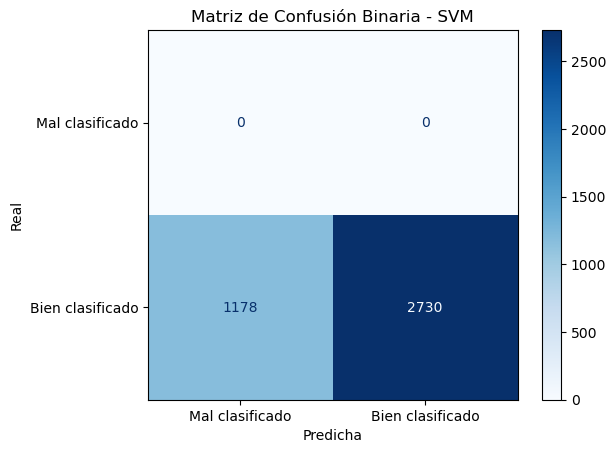

In [199]:
#SVM
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, ConfusionMatrixDisplay
)

# === 1. Datos ===
X = tfidf_dataframe_2.to_numpy()
y = data['SubRubro_encoded'].reset_index(drop=True)

# === 2. Modelo SVM con mejores hiperparámetros encontrados ===
modelo = SVC(C=10, kernel='linear', gamma='scale')

# === 3. Validación cruzada ===
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


resultados = []  #lista donde se van a guardar las métricas (accuracy, precisión, recall, F1, tiempo) de cada pliegue.
y_true_bin = [] #lista de las etiquetas "reales" binarizadas (1 si fue bien clasificado, 0 si no).
y_pred_bin = [] #lista de las predicciones binarizadas (lo que el modelo predijo que fue "bien o mal" clasificado).

inicio_total = time.time()

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), start=1): #bucle por cada pliegue de la validación cruzada.

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    print(f"\nPliegue {fold}:")
    print(f"  Registros en entrenamiento: {len(train_idx)}")
    print(f"  Registros en prueba:        {len(test_idx)}")
    print(f"  Total del pliegue:          {len(train_idx) + len(test_idx)}")

    inicio = time.time()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    fin = time.time()

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)   
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    tiempo = fin - inicio

    resultados.append({
        'Pliegue': fold,
        'Accuracy': acc,
        'Precisión': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Tiempo (s)': tiempo
    })

    # --- Binaria: Bien vs Mal Clasificado ---
    binaria = (y_pred == y_test).astype(int)
    y_true_bin.extend([1] * len(binaria))  # lo esperado: acertar
    y_pred_bin.extend(binaria)             # 1 si acertó, 0 si no

# === 4. Mostrar métricas ===
resultados_df = pd.DataFrame(resultados)
print("\nResultados por pliegue:")
print(resultados_df.round(4))

print("\nPromedios:")
print(resultados_df.drop(columns="Pliegue").mean().to_frame().T.round(4))

fin_total = time.time()
print(f"\n⏱️ Tiempo total de ejecución: {round(fin_total - inicio_total, 2)} segundos")

# === 5. Matriz de confusión binaria ===
cm = confusion_matrix(y_true_bin, y_pred_bin, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Mal clasificado", "Bien clasificado"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión Binaria - SVM")
plt.ylabel("Real")
plt.xlabel("Predicha")
plt.show()


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



Pliegue 1:
  Registros en entrenamiento: 3117
  Registros en prueba:        780
  Clases en pliegue:          105

Pliegue 2:
  Registros en entrenamiento: 3117
  Registros en prueba:        780
  Clases en pliegue:          105

Pliegue 3:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Clases en pliegue:          105

Pliegue 4:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Clases en pliegue:          105

Pliegue 5:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Clases en pliegue:          105

Resultados por pliegue:
   Pliegue  Accuracy  Precisión  Recall  F1-Score  Tiempo (s)
0        1    0.6936     0.7102  0.5449    0.6729     23.9722
1        2    0.7269     0.7408  0.6130    0.7106     22.8451
2        3    0.6906     0.7130  0.5353    0.6783     22.7743
3        4    0.6829     0.7404  0.5200    0.6715     22.8728
4        5    0.7176     0.7534  0.5704    0.7050     22.6266

Promedios:
   Accuracy  Pre

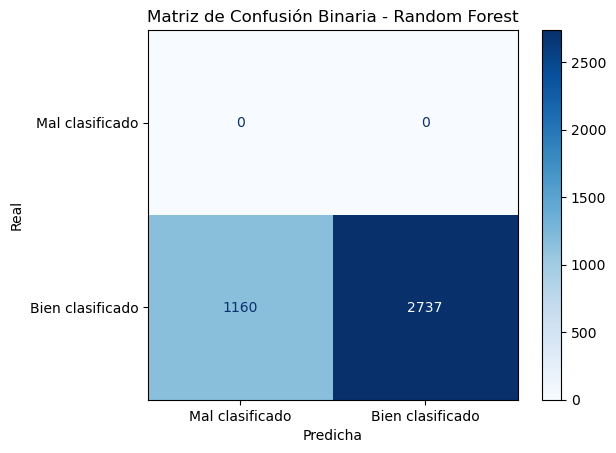

In [73]:
#randon forest
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, ConfusionMatrixDisplay
)

# === 1. Datos ===
X = tfidf_dataframe_2.to_numpy()
y_original = data['SubRubro_encoded'].reset_index(drop=True)

# Filtrar clases con al menos 2 ejemplos
conteo = y_original.value_counts()
clases_validas = conteo[conteo >= 2].index
mask = y_original.isin(clases_validas)
X = X[mask]
y = y_original[mask].reset_index(drop=True)

# === 2. Validación cruzada ===
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
resultados = []
y_true_bin = []
y_pred_bin = []

inicio_total = time.time()

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train_orig = y.iloc[train_idx].reset_index(drop=True)
    y_test_orig = y.iloc[test_idx].reset_index(drop=True)

    # Mapear las clases locales
    clases_unicas = np.sort(y_train_orig.unique())
    clase_a_indice = {clase: i for i, clase in enumerate(clases_unicas)}
    y_train = y_train_orig.map(clase_a_indice)
    y_test = y_test_orig.map(clase_a_indice)

    modelo = RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        min_samples_split=5,
        min_samples_leaf=1,
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    )

    print(f"\nPliegue {fold}:")
    print(f"  Registros en entrenamiento: {len(train_idx)}")
    print(f"  Registros en prueba:        {len(test_idx)}")
    print(f"  Clases en pliegue:          {len(clases_unicas)}")

    inicio = time.time()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    fin = time.time()

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    tiempo = fin - inicio

    resultados.append({
        'Pliegue': fold,
        'Accuracy': acc,
        'Precisión': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Tiempo (s)': tiempo
    })

    # Clasificación binaria: bien vs mal clasificado
    bien_clasificado = (y_pred == y_test).astype(int)
    y_true_bin.extend([1] * len(bien_clasificado))  # lo esperado: acertar
    y_pred_bin.extend(bien_clasificado)
   
   
# === 3. Resultados promedio ===
resultados_df = pd.DataFrame(resultados)
print("\nResultados por pliegue:")
print(resultados_df.round(4))
print("\nPromedios:")
print(resultados_df.drop(columns="Pliegue").mean().to_frame().T.round(4))
print(f"\n⏱️ Tiempo total: {round(time.time() - inicio_total, 2)} segundos")

# === 4. Matriz de confusión binaria ===
cm = confusion_matrix(y_true_bin, y_pred_bin, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Mal clasificado", "Bien clasificado"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión Binaria - Random Forest")
plt.ylabel("Real")
plt.xlabel("Predicha")
plt.show()



Accuracy:  0.5817
Precisión: 0.6998
Recall:    0.3984
F1-Score:  0.5841
⏱️ Tiempo: 17.21 segundos


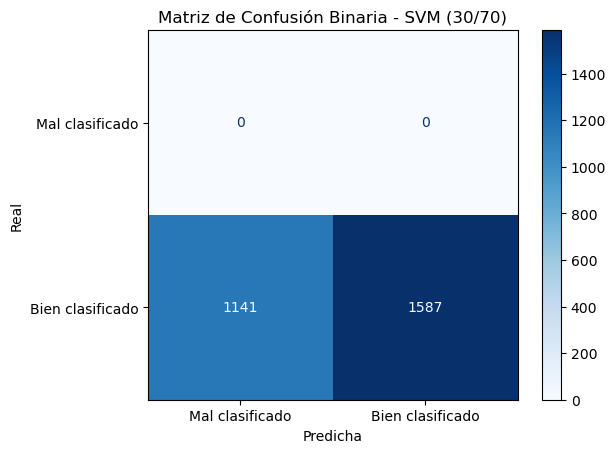

In [201]:
# Prueba con diferente porcentaje de entrenamiento y test.
# SVM probando 30 y 70
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, ConfusionMatrixDisplay
)
# === 1. Datos originales ===
X = tfidf_dataframe_2.to_numpy()
y = data['SubRubro_encoded'].reset_index(drop=True)

# === 2. Filtrar clases con al menos 2 registros ===
conteo_clases = y.value_counts()
clases_validas = conteo_clases[conteo_clases >= 2].index
mask = y.isin(clases_validas)

X_filtrado = X[mask]
y_filtrado = y[mask].reset_index(drop=True)

# === 3. Separar en 30% entrenamiento y 70% test ===
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_filtrado, y_filtrado, test_size=0.7, random_state=42, stratify=y_filtrado
)

# === 4. Definir modelo y continuar con tu script como siempre ===
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import time
import matplotlib.pyplot as plt

modelo = SVC(C=10, kernel='linear', gamma='scale')

inicio = time.time()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
fin = time.time()

# Métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"\nAccuracy:  {acc:.4f}")
print(f"Precisión: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"⏱️ Tiempo: {round(fin - inicio, 2)} segundos")

# Matriz binaria (bien vs mal clasificado)
binaria = (y_pred == y_test).astype(int)
y_true_bin = [1] * len(binaria)
y_pred_bin = binaria

cm = confusion_matrix(y_true_bin, y_pred_bin, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Mal clasificado", "Bien clasificado"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión Binaria - SVM (30/70)")
plt.ylabel("Real")
plt.xlabel("Predicha")
plt.show()


In [ ]:
#ahora aplicaremos SMOTE y agrego una nueva métrica 

In [27]:
#SVM 
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import defaultdict
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
from datetime import datetime

# ===  Datos  ===
X = tfidf_dataframe_2.to_numpy()
y = data['SubRubro_encoded'].reset_index(drop=True)

# Suponemos X, y ya definidos (arrays o matrices)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
modelo = SVC(C=10, kernel='linear', gamma='scale', probability=False)

y_test_total = []
y_pred_total = []

inicio_total = datetime.now()

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Contamos la clase minoritaria
    unique, counts = np.unique(y_train, return_counts=True)
    class_counts = dict(zip(unique, counts))
    min_count = min(class_counts.values())

    if min_count > 1:
        # SMOTE seguro si hay ≥2 muestras
        sampler = SMOTE(k_neighbors=1, random_state=42)
    else:
        # En caso extremo con 1 muestra, usamos RandomOverSampler
        sampler = RandomOverSampler(random_state=42)

    X_res, y_res = sampler.fit_resample(X_train, y_train)

    modelo.fit(X_res, y_res)
    y_pred = modelo.predict(X_test)

    y_test_total.extend(y_test)
    y_pred_total.extend(y_pred)

fin_total = datetime.now()

# Métricas globales
# Métricas globales para clasificación multiclase
accuracy       = accuracy_score(y_test_total, y_pred_total)
precision      = precision_score(y_test_total, y_pred_total, average='weighted', zero_division=0)
recall         = recall_score(y_test_total, y_pred_total, average='weighted', zero_division=0)
f1             = f1_score(y_test_total, y_pred_total, average='weighted', zero_division=0)
f1_weighted    = f1  # redundante, pero si querés dejarlo explícito

matriz_final   = confusion_matrix(y_test_total, y_pred_total)

print("\n⏱ Tiempo total de ejecución:")
print(f"  Inicio: {inicio_total.strftime('%H:%M:%S')}")
print(f"  Fin:    {fin_total.strftime('%H:%M:%S')}")

print("\n📊 Métricas globales (multiclase - promedio ponderado):")
print(f"  Accuracy:          {accuracy:.4f}")
print(f"  Precisión:         {precision:.4f}")
print(f"  Recall:            {recall:.4f}")
print(f"  F1-Score:          {f1:.4f}")

print("\n🧾 Matriz de confusión global:")
print(matriz_final)


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



⏱ Tiempo total de ejecución:
  Inicio: 19:54:43
  Fin:    20:42:39

📊 Métricas globales (multiclase - promedio ponderado):
  Accuracy:          0.6563
  Precisión:         0.7774
  Recall:            0.6563
  F1-Score:          0.7059

🧾 Matriz de confusión global:
[[32  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  1]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0 36  0]
 [ 0  0  4 ...  0  0 29]]


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



⏱ Tiempo total de ejecución:
  Inicio: 21:06:17
  Fin:    21:54:05

📊 Métricas globales (multiclase - promedio ponderado):
  Accuracy:          0.6563
  Precisión:         0.7774
  Recall:            0.6563
  F1-Score Weighted: 0.7059

🧾 Matriz de confusión multiclase global:
[[32  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  1]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0 36  0]
 [ 0  0  4 ...  0  0 29]]

🧾 Matriz de confusión binaria (aciertos vs errores):
                Real
             Bien   Mal
Predicho Bien  2565     0
Predicho Mal   0     1343


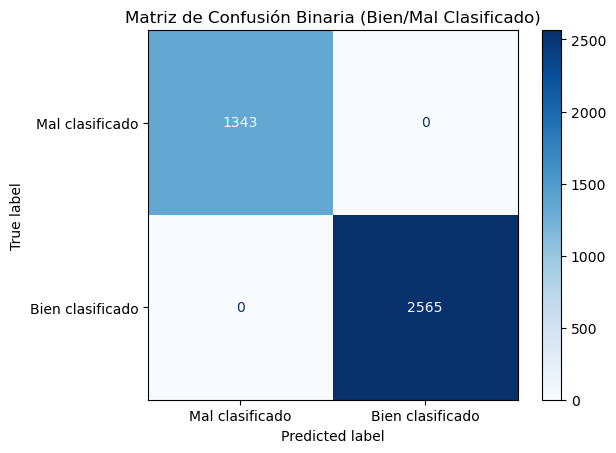

In [28]:
#svm 2
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, ConfusionMatrixDisplay
)
from imblearn.over_sampling import SMOTE, RandomOverSampler
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt


# ===  Datos  ===
X = tfidf_dataframe_2.to_numpy()
y = data['SubRubro_encoded'].reset_index(drop=True)

# 👉 Suponemos que X e y ya están definidos (como arrays o matrices NumPy)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
modelo = SVC(C=10, kernel='linear', gamma='scale', probability=False)

# Acumuladores de predicciones
y_test_total = []
y_pred_total = []

# Tiempo total
inicio_total = datetime.now()

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Determinar si aplicar SMOTE o RandomOverSampler
    unique, counts = np.unique(y_train, return_counts=True)
    min_count = min(counts)

    if min_count > 1:
        sampler = SMOTE(k_neighbors=1, random_state=42)
    else:
        sampler = RandomOverSampler(random_state=42)

    X_res, y_res = sampler.fit_resample(X_train, y_train)

    modelo.fit(X_res, y_res)
    y_pred = modelo.predict(X_test)

    y_test_total.extend(y_test)
    y_pred_total.extend(y_pred)

fin_total = datetime.now()

# Convertimos a arrays
y_test_total = np.array(y_test_total)
y_pred_total = np.array(y_pred_total)

# ----------------------
# 📊 Métricas globales
# ----------------------
accuracy       = accuracy_score(y_test_total, y_pred_total)
precision      = precision_score(y_test_total, y_pred_total, average='weighted', zero_division=0)
recall         = recall_score(y_test_total, y_pred_total, average='weighted', zero_division=0)
f1             = f1_score(y_test_total, y_pred_total, average='weighted', zero_division=0)
matriz_final   = confusion_matrix(y_test_total, y_pred_total)

print("\n⏱ Tiempo total de ejecución:")
print(f"  Inicio: {inicio_total.strftime('%H:%M:%S')}")
print(f"  Fin:    {fin_total.strftime('%H:%M:%S')}")

print("\n📊 Métricas globales (multiclase - promedio ponderado):")
print(f"  Accuracy:          {accuracy:.4f}")
print(f"  Precisión:         {precision:.4f}")
print(f"  Recall:            {recall:.4f}")
print(f"  F1-Score Weighted: {f1:.4f}")

print("\n🧾 Matriz de confusión multiclase global:")
print(matriz_final)

# ----------------------
# 🧾 Matriz binaria de aciertos vs errores
# ----------------------
y_bin_real = (y_test_total == y_pred_total).astype(int)  # 1 si acierto, 0 si error
y_bin_pred = y_bin_real  # usamos lo mismo para simplificar interpretación

matriz_binaria = confusion_matrix(y_bin_real, y_bin_pred)

print("\n🧾 Matriz de confusión binaria (aciertos vs errores):")
print("                Real")
print("             Bien   Mal")
print("Predicho Bien ", matriz_binaria[1,1], "   ", matriz_binaria[1,0])
print("Predicho Mal  ", matriz_binaria[0,1], "   ", matriz_binaria[0,0])

# ----------------------
# 📊 Visualización gráfica
# ----------------------
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_binaria,
                              display_labels=["Mal clasificado", "Bien clasificado"])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión Binaria (Bien/Mal Clasificado)")
plt.grid(False)
plt.show()


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



⏱ Tiempo de entrenamiento total:
Inicio: 18:58:24
Fin:    19:41:26
Duración: 2581.89 segundos

📊 Métricas globales (ponderadas):
Accuracy:           0.6563
Precisión:          0.7774
Recall:             0.6563
F1-Score:           0.7059
F1-Score Weighted:  0.7059
Tiempo (s):         2581.89

🧾 Matriz binaria (aciertos vs errores):
[[1343    0]
 [   0 2565]]


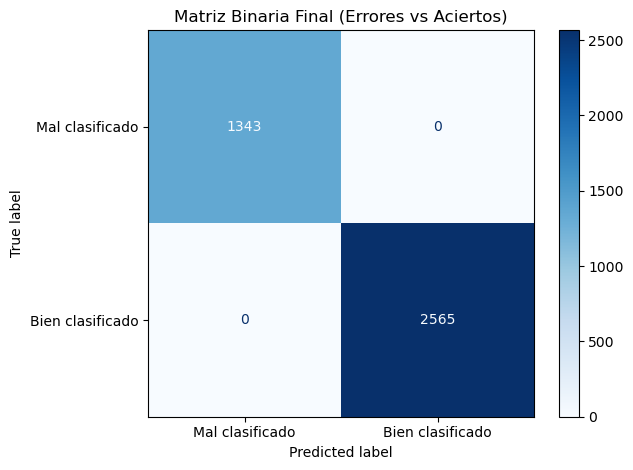

In [30]:
#svm 2

#acplico SMOTE al conjunto de entre

from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, ConfusionMatrixDisplay
)
from imblearn.over_sampling import SMOTE, RandomOverSampler
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

# ===  Datos  ===
X = tfidf_dataframe_2.to_numpy()
y = data['SubRubro_encoded'].reset_index(drop=True)

modelo = SVC(C=10, kernel='linear', gamma='scale')
k_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_test_total = []
y_pred_total = []

# ⏱ Iniciar tiempo total
inicio_total = datetime.now()

# 🚀 Validación cruzada con SMOTE
for train_index, test_index in k_folds.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # SMOTE o RandomOverSampler según cantidad
    class_counts = np.bincount(y_train)
    if np.min(class_counts) > 1:
        sampler = SMOTE(k_neighbors=1, random_state=42)
    else:
        sampler = RandomOverSampler(random_state=42)

    X_train_res, y_train_res = sampler.fit_resample(X_train, y_train)

    modelo.fit(X_train_res, y_train_res)
    y_pred = modelo.predict(X_test)

    y_test_total.extend(y_test)
    y_pred_total.extend(y_pred)

# ⏱ Fin de entrenamiento
fin_total = datetime.now()
tiempo_total_segundos = (fin_total - inicio_total).total_seconds()

# 🧮 Convertir resultados
y_test_total = np.array(y_test_total)
y_pred_total = np.array(y_pred_total)

accuracy    = accuracy_score(y_test_total, y_pred_total)
precision   = precision_score(y_test_total, y_pred_total, average='weighted', zero_division=0)
recall      = recall_score(y_test_total, y_pred_total, average='weighted', zero_division=0)
f1          = f1_score(y_test_total, y_pred_total, average='weighted', zero_division=0)
f1_weighted = f1  # redundante para claridad



# 📌 Matriz binaria de aciertos vs errores
correctos_bin = (y_test_total == y_pred_total).astype(int)
matriz_binaria = confusion_matrix(correctos_bin, correctos_bin)

# 📋 Resultados
print("\n⏱ Tiempo de entrenamiento total:")
print(f"Inicio: {inicio_total.strftime('%H:%M:%S')}")
print(f"Fin:    {fin_total.strftime('%H:%M:%S')}")
print(f"Duración: {tiempo_total_segundos:.2f} segundos")

print("\n📊 Métricas globales (ponderadas):")
print(f"Accuracy:           {accuracy:.4f}")
print(f"Precisión:          {precision:.4f}")
print(f"Recall:             {recall:.4f}")
print(f"F1-Score:           {f1:.4f}")
print(f"F1-Score Weighted:  {f1_weighted:.4f}")
print(f"Tiempo (s):         {tiempo_total_segundos:.2f}")


print("\n🧾 Matriz binaria (aciertos vs errores):")
print(matriz_binaria)

# 📈 Gráfico de matriz binaria
disp = ConfusionMatrixDisplay(
    confusion_matrix=matriz_binaria,
    display_labels=["Mal clasificado", "Bien clasificado"]
)
disp.plot(cmap='Blues')
plt.title("Matriz Binaria Final (Errores vs Aciertos)")
plt.grid(False)
plt.tight_layout()
plt.show()


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Pliegue 1:
  Registros en entrenamiento: 3126
  Registros en prueba:        782
⚠️ SMOTE no aplicable, usando RandomOverSampler

Pliegue 2:
  Registros en entrenamiento: 3126
  Registros en prueba:        782
⚠️ SMOTE no aplicable, usando RandomOverSampler

Pliegue 3:
  Registros en entrenamiento: 3126
  Registros en prueba:        782
⚠️ SMOTE no aplicable, usando RandomOverSampler

Pliegue 4:
  Registros en entrenamiento: 3127
  Registros en prueba:        781
⚠️ SMOTE no aplicable, usando RandomOverSampler

Pliegue 5:
  Registros en entrenamiento: 3127
  Registros en prueba:        781
⚠️ SMOTE no aplicable, usando RandomOverSampler

📊 Resultados por pliegue:
   Pliegue  Accuracy  Precisión Weighted  Recall Macro  F1-Score Macro  \
0        1    0.6253              0.7431        0.4790          0.4990   
1        2    0.6765              0.7827        0.5295          0.5332   
2        3    0.6598              0.7835        0.5598          0.5548   
3        4    0.6389            

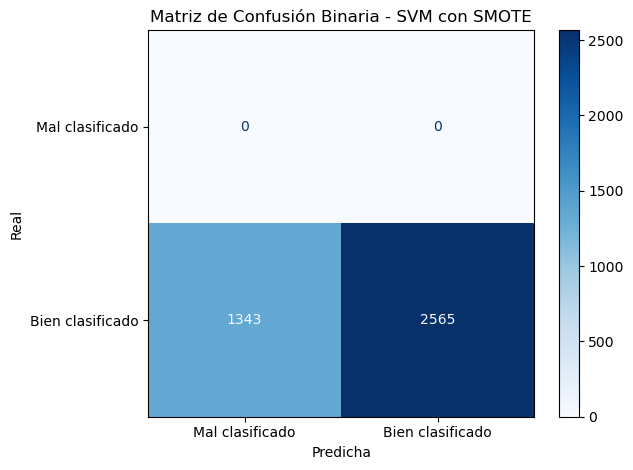

In [31]:
#svm 3
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, ConfusionMatrixDisplay
)
from imblearn.over_sampling import SMOTE, RandomOverSampler

# === 1. Datos ===
X = tfidf_dataframe_2.to_numpy()
y = data['SubRubro_encoded'].reset_index(drop=True)

# === 2. Modelo SVM con hiperparámetros ajustados ===
modelo = SVC(C=10, kernel='linear', gamma='scale')

# === 3. Validación cruzada ===
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

resultados = []
y_true_bin = []
y_pred_bin = []

inicio_total = time.time()

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    print(f"\nPliegue {fold}:")
    print(f"  Registros en entrenamiento: {len(train_idx)}")
    print(f"  Registros en prueba:        {len(test_idx)}")

    try:
        smote = SMOTE(k_neighbors=1, random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
        print(f"  Registros después de SMOTE: {len(X_train_res)}")
    except ValueError:
        print("⚠️ SMOTE no aplicable, usando RandomOverSampler")
        ros = RandomOverSampler(random_state=42)
        X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

    inicio = time.time()
    modelo.fit(X_train_res, y_train_res)
    y_pred = modelo.predict(X_test)
    fin = time.time()

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)
    f1_weighted = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    tiempo = fin - inicio

    resultados.append({
        'Pliegue': fold,
        'Accuracy': acc,
        'Precisión Weighted': prec,
        'Recall Macro': rec,
        'F1-Score Macro': f1_macro,
        'F1-Score Weighted': f1_weighted,
        'Tiempo (s)': tiempo
    })

    binaria = (y_pred == y_test).astype(int)
    y_true_bin.extend([1] * len(binaria))
    y_pred_bin.extend(binaria)

# === 4. Mostrar métricas ===
resultados_df = pd.DataFrame(resultados)
print("\n📊 Resultados por pliegue:")
print(resultados_df.round(4))

print("\n📈 Promedios globales:")
print(resultados_df.drop(columns="Pliegue").mean().to_frame().T.round(4))

fin_total = time.time()
print(f"\n⏱️ Tiempo total de ejecución: {round(fin_total - inicio_total, 2)} segundos")

# === 5. Matriz de confusión binaria final ===
cm = confusion_matrix(y_true_bin, y_pred_bin, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Mal clasificado", "Bien clasificado"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión Binaria - SVM con SMOTE")
plt.ylabel("Real")
plt.xlabel("Predicha")
plt.tight_layout()
plt.show()


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



Pliegue 1: ⚠️ SMOTE no aplicable, usando RandomOverSampler
  Registros en prueba:        780
  Clases en pliegue:          105

Pliegue 2: ⚠️ SMOTE no aplicable, usando RandomOverSampler
  Registros en prueba:        780
  Clases en pliegue:          105

Pliegue 3: ⚠️ SMOTE no aplicable, usando RandomOverSampler
  Registros en prueba:        779
  Clases en pliegue:          105

Pliegue 4: ⚠️ SMOTE no aplicable, usando RandomOverSampler
  Registros en prueba:        779
  Clases en pliegue:          105

Pliegue 5: ⚠️ SMOTE no aplicable, usando RandomOverSampler
  Registros en prueba:        779
  Clases en pliegue:          105

📊 Resultados por pliegue:
   Pliegue  Accuracy  Precisión Weighted  Recall Macro  F1-Score Macro  \
0        1    0.6910              0.7279        0.5352          0.5145   
1        2    0.7141              0.7491        0.6167          0.6005   
2        3    0.6983              0.7472        0.5800          0.5489   
3        4    0.6932              0.7

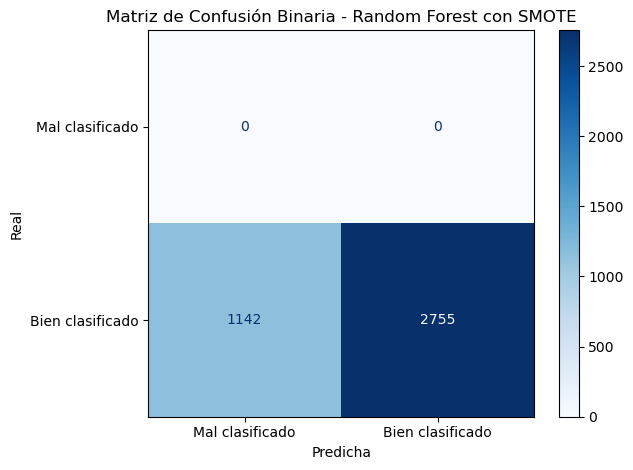

In [32]:
#random forest
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, ConfusionMatrixDisplay
)
from imblearn.over_sampling import SMOTE, RandomOverSampler

# === 1. Datos ===
X = tfidf_dataframe_2.to_numpy()
y_original = data['SubRubro_encoded'].reset_index(drop=True)

# Filtrar clases con al menos 2 ejemplos
conteo = y_original.value_counts()
clases_validas = conteo[conteo >= 2].index
mask = y_original.isin(clases_validas)
X = X[mask]
y = y_original[mask].reset_index(drop=True)

# === 2. Validación cruzada ===
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
resultados = []
y_true_bin = []
y_pred_bin = []

inicio_total = time.time()

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train_orig = y.iloc[train_idx].reset_index(drop=True)
    y_test_orig = y.iloc[test_idx].reset_index(drop=True)

    # Mapear las clases locales por pliegue
    clases_unicas = np.sort(y_train_orig.unique())
    clase_a_indice = {clase: i for i, clase in enumerate(clases_unicas)}
    y_train = y_train_orig.map(clase_a_indice)
    y_test = y_test_orig.map(clase_a_indice)

    # === Aplicar SMOTE o fallback a RandomOverSampler ===
    try:
        smote = SMOTE(k_neighbors=1, random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
        print(f"\nPliegue {fold}:")
        print(f"  Registros en entrenamiento antes de SMOTE: {len(X_train)}")
        print(f"  Registros después de SMOTE:                {len(X_train_res)}")
    except ValueError:
        print(f"\nPliegue {fold}: ⚠️ SMOTE no aplicable, usando RandomOverSampler")
        ros = RandomOverSampler(random_state=42)
        X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

    print(f"  Registros en prueba:        {len(X_test)}")
    print(f"  Clases en pliegue:          {len(clases_unicas)}")

    modelo = RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        min_samples_split=5,
        min_samples_leaf=1,
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    )

    inicio = time.time()
    modelo.fit(X_train_res, y_train_res)
    y_pred = modelo.predict(X_test)
    fin = time.time()

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)
    f1_weighted = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    tiempo = fin - inicio

    resultados.append({
        'Pliegue': fold,
        'Accuracy': acc,
        'Precisión Weighted': prec,
        'Recall Macro': rec,
        'F1-Score Macro': f1_macro,
        'F1-Score Weighted': f1_weighted,
        'Tiempo (s)': tiempo
    })

    # Clasificación binaria: bien vs mal clasificado
    bien_clasificado = (y_pred == y_test).astype(int)
    y_true_bin.extend([1] * len(bien_clasificado))
    y_pred_bin.extend(bien_clasificado)

# === 3. Resultados promedio ===
resultados_df = pd.DataFrame(resultados)
print("\n📊 Resultados por pliegue:")
print(resultados_df.round(4))

print("\n📈 Promedios globales:")
print(resultados_df.drop(columns="Pliegue").mean().to_frame().T.round(4))

print(f"\n⏱️ Tiempo total: {round(time.time() - inicio_total, 2)} segundos")

# === 4. Matriz de confusión binaria ===
cm = confusion_matrix(y_true_bin, y_pred_bin, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Mal clasificado", "Bien clasificado"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión Binaria - Random Forest con SMOTE")
plt.ylabel("Real")
plt.xlabel("Predicha")
plt.tight_layout()
plt.show()


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



Pliegue 1: ⚠️ SMOTE no aplicable, usando RandomOverSampler
  Registros en prueba:        780
  Clases en pliegue:          105

Pliegue 2: ⚠️ SMOTE no aplicable, usando RandomOverSampler
  Registros en prueba:        780
  Clases en pliegue:          105

Pliegue 3: ⚠️ SMOTE no aplicable, usando RandomOverSampler
  Registros en prueba:        779
  Clases en pliegue:          105

Pliegue 4: ⚠️ SMOTE no aplicable, usando RandomOverSampler
  Registros en prueba:        779
  Clases en pliegue:          105

Pliegue 5: ⚠️ SMOTE no aplicable, usando RandomOverSampler
  Registros en prueba:        779
  Clases en pliegue:          105

📊 Resultados por pliegue:
   Pliegue  Accuracy  Precisión Weighted  Recall Macro  F1-Score Macro  \
0        1    0.6000              0.6819        0.4756          0.4751   
1        2    0.6244              0.7295        0.5433          0.5434   
2        3    0.6033              0.7028        0.5020          0.5032   
3        4    0.5931              0.6

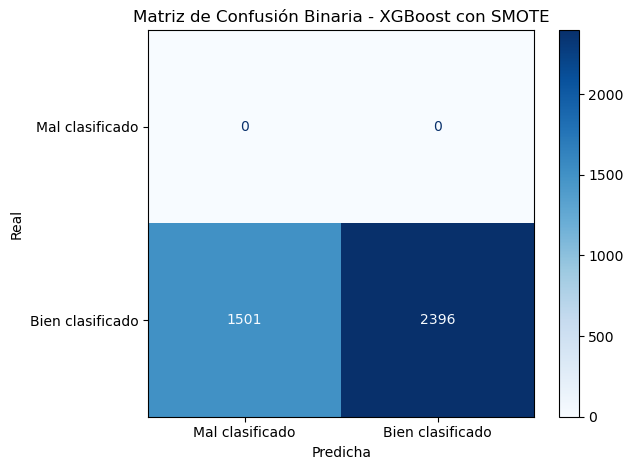

In [33]:
#XBboots
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, ConfusionMatrixDisplay
)
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler

# === 1. Datos ===
X = tfidf_dataframe_2.to_numpy()
y_original = data['SubRubro_encoded'].reset_index(drop=True)

# Filtrar clases con al menos 2 ejemplos
conteo = y_original.value_counts()
clases_validas = conteo[conteo >= 2].index
mask = y_original.isin(clases_validas)
X = X[mask]
y = y_original[mask].reset_index(drop=True)

# === 2. Validación cruzada ===
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
resultados = []
y_true_bin = []
y_pred_bin = []

inicio_total = time.time()

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train_orig = y.iloc[train_idx].reset_index(drop=True)
    y_test_orig = y.iloc[test_idx].reset_index(drop=True)

    # Mapear clases locales
    clases_unicas = np.sort(y_train_orig.unique())
    clase_a_indice = {clase: i for i, clase in enumerate(clases_unicas)}
    y_train = y_train_orig.map(clase_a_indice)
    y_test = y_test_orig.map(clase_a_indice)

    # === Aplicar SMOTE o RandomOverSampler si hay clases con muy pocos ejemplos ===
    try:
        smote = SMOTE(k_neighbors=1, random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
        print(f"\nPliegue {fold}:")
        print(f"  Registros entrenamiento antes de SMOTE: {len(X_train)}")
        print(f"  Registros después de SMOTE:            {len(X_train_res)}")
    except ValueError:
        print(f"\nPliegue {fold}: ⚠️ SMOTE no aplicable, usando RandomOverSampler")
        ros = RandomOverSampler(random_state=42)
        X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

    print(f"  Registros en prueba:        {len(X_test)}")
    print(f"  Clases en pliegue:          {len(clases_unicas)}")

    modelo = XGBClassifier(
        use_label_encoder=False,
        eval_metric='mlogloss',
        objective='multi:softmax',
        num_class=len(clases_unicas),
        colsample_bytree=0.8,
        gamma=0,
        learning_rate=0.2,
        max_depth=6,
        min_child_weight=1,
        n_estimators=50,
        reg_lambda=1,
        subsample=0.8,
        verbosity=0
    )

    inicio = time.time()
    modelo.fit(X_train_res, y_train_res)
    y_pred = modelo.predict(X_test)
    fin = time.time()

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)
    f1_weighted = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    tiempo = fin - inicio

    resultados.append({
        'Pliegue': fold,
        'Accuracy': acc,
        'Precisión Weighted': prec,
        'Recall Macro': rec,
        'F1-Score Macro': f1_macro,
        'F1-Score Weighted': f1_weighted,
        'Tiempo (s)': tiempo
    })

    # Matriz binaria de aciertos vs errores
    binaria = (y_pred == y_test).astype(int)
    y_true_bin.extend([1] * len(binaria))
    y_pred_bin.extend(binaria)

# === 3. Mostrar métricas ===
resultados_df = pd.DataFrame(resultados)
print("\n📊 Resultados por pliegue:")
print(resultados_df.round(4))

print("\n📈 Promedios globales:")
print(resultados_df.drop(columns="Pliegue").mean().to_frame().T.round(4))

print(f"\n⏱️ Tiempo total: {round(time.time() - inicio_total, 2)} segundos")

# === 4. Matriz de confusión binaria ===
cm = confusion_matrix(y_true_bin, y_pred_bin, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Mal clasificado", "Bien clasificado"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión Binaria - XGBoost con SMOTE")
plt.ylabel("Real")
plt.xlabel("Predicha")
plt.tight_layout()
plt.show()


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Pliegue 1:
  Registros entrenamiento antes de SMOTE: 3126
  Registros prueba:                       782
  ⚠️ SMOTE no aplicable, usando RandomOverSampler

Pliegue 2:
  Registros entrenamiento antes de SMOTE: 3126
  Registros prueba:                       782
  ⚠️ SMOTE no aplicable, usando RandomOverSampler

Pliegue 3:
  Registros entrenamiento antes de SMOTE: 3126
  Registros prueba:                       782
  ⚠️ SMOTE no aplicable, usando RandomOverSampler

Pliegue 4:
  Registros entrenamiento antes de SMOTE: 3127
  Registros prueba:                       781
  ⚠️ SMOTE no aplicable, usando RandomOverSampler

Pliegue 5:
  Registros entrenamiento antes de SMOTE: 3127
  Registros prueba:                       781
  ⚠️ SMOTE no aplicable, usando RandomOverSampler

📊 Resultados por pliegue:
   Pliegue  Accuracy  Precisión Weighted  Recall Macro  F1-Score Macro  \
0        1    0.5486              0.7990        0.4562          0.4880   
1        2    0.5665              0.8022        0.

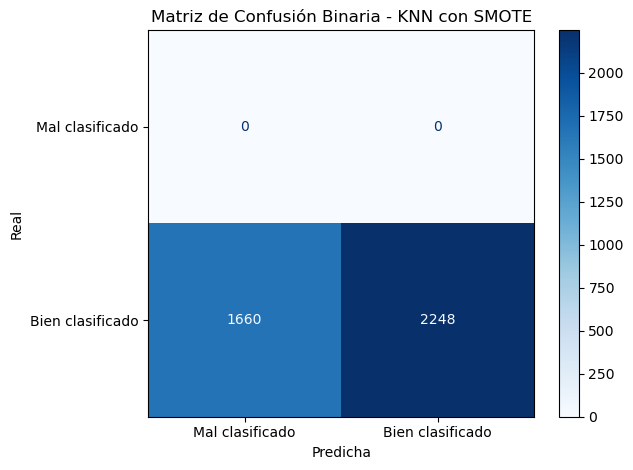

In [34]:
#knn
#En algunos pliegues, debido a la baja frecuencia de ciertas clases, SMOTE no pudo aplicarse 
#(por requerir al menos 2 muestras por clase). En esos casos se utilizó RandomOverSampler 
#como técnica de balanceo alternativa para permitir el entrenamiento del modelo sin interrupciones.
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, ConfusionMatrixDisplay
)
from imblearn.over_sampling import SMOTE, RandomOverSampler

# === 1. Datos ===
X = tfidf_dataframe_2.to_numpy()
y = data['SubRubro_encoded'].reset_index(drop=True)

# === 2. Definir modelo con mejores hiperparámetros ===
modelo = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='euclidean')

# === 3. Validación cruzada ===
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

resultados = []
y_true_bin = []
y_pred_bin = []

inicio_total = time.time()

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    print(f"\nPliegue {fold}:")
    print(f"  Registros entrenamiento antes de SMOTE: {len(X_train)}")
    print(f"  Registros prueba:                       {len(X_test)}")

    # === Aplicar SMOTE (o RandomOverSampler si es necesario) ===
    try:
        smote = SMOTE(k_neighbors=1, random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
        print(f"  Registros entrenamiento después de SMOTE: {len(X_train_res)}")
    except ValueError:
        print(f"  ⚠️ SMOTE no aplicable, usando RandomOverSampler")
        ros = RandomOverSampler(random_state=42)
        X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

    # === Entrenamiento y predicción ===
    inicio = time.time()
    modelo.fit(X_train_res, y_train_res)
    y_pred = modelo.predict(X_test)
    fin = time.time()

    # === Cálculo de métricas ===
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)
    f1_weighted = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    tiempo = fin - inicio

    resultados.append({
        'Pliegue': fold,
        'Accuracy': acc,
        'Precisión Weighted': prec,
        'Recall Macro': rec,
        'F1-Score Macro': f1_macro,
        'F1-Score Weighted': f1_weighted,
        'Tiempo (s)': tiempo
    })

    # === Binaria: Bien vs Mal Clasificado ===
    binaria = (y_pred == y_test).astype(int)
    y_true_bin.extend([1] * len(binaria))  # se espera acertar (1)
    y_pred_bin.extend(binaria)             # 1 si acertó, 0 si falló

# === 4. Mostrar métricas ===
resultados_df = pd.DataFrame(resultados)
print("\n📊 Resultados por pliegue:")
print(resultados_df.round(4))

print("\n📈 Promedios globales:")
print(resultados_df.drop(columns="Pliegue").mean().to_frame().T.round(4))

fin_total = time.time()
print(f"\n⏱️ Tiempo total de ejecución: {round(fin_total - inicio_total, 2)} segundos")

# === 5. Matriz de confusión binaria ===
cm = confusion_matrix(y_true_bin, y_pred_bin, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Mal clasificado", "Bien clasificado"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión Binaria - KNN con SMOTE")
plt.ylabel("Real")
plt.xlabel("Predicha")
plt.tight_layout()
plt.show()


In [ ]:
#Regresion logistica
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    precision_score, recall_score, f1_score, accuracy_score
)
from imblearn.over_sampling import SMOTE, RandomOverSampler

# === 1. Datos ===
X = tfidf_dataframe_2.to_numpy()
y = data['SubRubro_encoded'].reset_index(drop=True)

# === 2. Modelo con hiperparámetros ajustados ===
modelo = LogisticRegression(
    C=100,
    max_iter=500,
    multi_class='multinomial',
    penalty='l2',
    solver='saga'
)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

resultados = []
y_true_bin = []
y_pred_bin = []

inicio_total = time.time()

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    print(f"\nPliegue {fold}:")
    print(f"  Registros en entrenamiento: {len(X_train)}")
    print(f"  Registros en prueba:        {len(X_test)}")

    # === Aplicar SMOTE o RandomOverSampler ===
    try:
        smote = SMOTE(k_neighbors=1, random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
        print(f"  Registros después de SMOTE: {len(X_train_res)}")
    except ValueError:
        print("⚠️ SMOTE no aplicable, usando RandomOverSampler")
        ros = RandomOverSampler(random_state=42)
        X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

    # === Entrenamiento y predicción ===
    inicio = time.time()
    modelo.fit(X_train_res, y_train_res)
    y_pred = modelo.predict(X_test)
    fin = time.time()

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)
    f1_weighted = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    tiempo = fin - inicio

    resultados.append({
        'Pliegue': fold,
        'Accuracy': acc,
        'Precisión Weighted': prec,
        'Recall Macro': rec,
        'F1-Score Macro': f1_macro,
        'F1-Score Weighted': f1_weighted,
        'Tiempo (s)': tiempo
    })

    # Matriz binaria: 1 si acierto, 0 si error
    binaria = (y_pred == y_test).astype(int)
    y_true_bin.extend([1] * len(binaria))  # lo esperado: acertar
    y_pred_bin.extend(binaria)

# === 3. Mostrar métricas ===
resultados_df = pd.DataFrame(resultados)
print("\n📊 Resultados por pliegue:")
print(resultados_df.round(4))

print("\n📈 Promedios globales:")
print(resultados_df.drop(columns="Pliegue").mean().to_frame().T.round(4))

fin_total = time.time()
print(f"\n⏱️ Tiempo total de ejecución: {round(fin_total - inicio_total, 2)} segundos")

# === 4. Matriz de confusión binaria ===
cm = confusion_matrix(y_true_bin, y_pred_bin, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Mal clasificado", "Bien clasificado"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión Binaria - Regresión Logística con SMOTE")
plt.ylabel("Real")
plt.xlabel("Predicha")
plt.tight_layout()
plt.show()


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Pliegue 1:
  Registros en entrenamiento: 3126
  Registros en prueba:        782
⚠️ SMOTE no aplicable, usando RandomOverSampler


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [29]:
#prueba de modelo y matriz por clases.
#es para entender como se aplicar e lmodelo por clase.
import numpy as np
from sklearn.metrics import (
    confusion_matrix, classification_report,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import os

# Lista de clases únicas del dataset
clases = np.unique(y_test_total)

# Crear carpeta para guardar imágenes
carpeta_salida = "matrices_binarias_ovr"
os.makedirs(carpeta_salida, exist_ok=True)

for clase in clases:
    print(f"\n🔍 Evaluando Clase '{clase}' (One-vs-Rest)")

    # Etiquetas binarias para clase actual
    y_true_bin = (y_test_total == clase).astype(int)
    y_pred_bin = (y_pred_total == clase).astype(int)

    # Matriz de confusión binaria
    matriz_binaria = confusion_matrix(y_true_bin, y_pred_bin)

    # Mostrar matriz en consola
    print("                Predicho")
    print("               No    Sí")
    print(f"Real No     {matriz_binaria[0,0]}   {matriz_binaria[0,1]}")
    print(f"Real Sí     {matriz_binaria[1,0]}   {matriz_binaria[1,1]}")

    # Reporte de métricas
    print("\n📊 Métricas:")
    print(classification_report(
        y_true_bin, y_pred_bin,
        target_names=["No " + str(clase), str(clase)],
        zero_division=0
    ))

    # Mostrar y guardar el gráfico
    disp = ConfusionMatrixDisplay(
        confusion_matrix=matriz_binaria,
        display_labels=["No " + str(clase), str(clase)]
    )
    disp.plot(cmap='YlGnBu')
    plt.title(f"Matriz Binaria (Clase {clase} vs Resto)")
    plt.grid(False)

    # Guardar imagen
    nombre_archivo = os.path.join(carpeta_salida, f"matriz_binaria_clase_{clase}.png")
    plt.savefig(nombre_archivo, bbox_inches='tight')
    plt.close()

    print(f"✅ Imagen guardada en: {nombre_archivo}")



🔍 Evaluando Clase '0' (One-vs-Rest)
                Predicho
               No    Sí
Real No     3836   5
Real Sí     35   32

📊 Métricas:
              precision    recall  f1-score   support

        No 0       0.99      1.00      0.99      3841
           0       0.86      0.48      0.62        67

    accuracy                           0.99      3908
   macro avg       0.93      0.74      0.81      3908
weighted avg       0.99      0.99      0.99      3908

✅ Imagen guardada en: matrices_binarias_ovr\matriz_binaria_clase_0.png

🔍 Evaluando Clase '1' (One-vs-Rest)
                Predicho
               No    Sí
Real No     3903   1
Real Sí     3   1

📊 Métricas:
              precision    recall  f1-score   support

        No 1       1.00      1.00      1.00      3904
           1       0.50      0.25      0.33         4

    accuracy                           1.00      3908
   macro avg       0.75      0.62      0.67      3908
weighted avg       1.00      1.00      1.00      390

✅ Imagen guardada en: matrices_binarias_ovr\matriz_binaria_clase_16.png

🔍 Evaluando Clase '17' (One-vs-Rest)
                Predicho
               No    Sí
Real No     3847   11
Real Sí     10   40

📊 Métricas:
              precision    recall  f1-score   support

       No 17       1.00      1.00      1.00      3858
          17       0.78      0.80      0.79        50

    accuracy                           0.99      3908
   macro avg       0.89      0.90      0.89      3908
weighted avg       0.99      0.99      0.99      3908

✅ Imagen guardada en: matrices_binarias_ovr\matriz_binaria_clase_17.png

🔍 Evaluando Clase '18' (One-vs-Rest)
                Predicho
               No    Sí
Real No     3890   8
Real Sí     7   3

📊 Métricas:
              precision    recall  f1-score   support

       No 18       1.00      1.00      1.00      3898
          18       0.27      0.30      0.29        10

    accuracy                           1.00      3908
   macro avg       0.64      0

✅ Imagen guardada en: matrices_binarias_ovr\matriz_binaria_clase_32.png

🔍 Evaluando Clase '33' (One-vs-Rest)
                Predicho
               No    Sí
Real No     3881   0
Real Sí     11   16

📊 Métricas:
              precision    recall  f1-score   support

       No 33       1.00      1.00      1.00      3881
          33       1.00      0.59      0.74        27

    accuracy                           1.00      3908
   macro avg       1.00      0.80      0.87      3908
weighted avg       1.00      1.00      1.00      3908

✅ Imagen guardada en: matrices_binarias_ovr\matriz_binaria_clase_33.png

🔍 Evaluando Clase '34' (One-vs-Rest)
                Predicho
               No    Sí
Real No     3907   0
Real Sí     1   0

📊 Métricas:
              precision    recall  f1-score   support

       No 34       1.00      1.00      1.00      3907
          34       0.00      0.00      0.00         1

    accuracy                           1.00      3908
   macro avg       0.50      0.

✅ Imagen guardada en: matrices_binarias_ovr\matriz_binaria_clase_48.png

🔍 Evaluando Clase '49' (One-vs-Rest)
                Predicho
               No    Sí
Real No     3868   11
Real Sí     20   9

📊 Métricas:
              precision    recall  f1-score   support

       No 49       0.99      1.00      1.00      3879
          49       0.45      0.31      0.37        29

    accuracy                           0.99      3908
   macro avg       0.72      0.65      0.68      3908
weighted avg       0.99      0.99      0.99      3908

✅ Imagen guardada en: matrices_binarias_ovr\matriz_binaria_clase_49.png

🔍 Evaluando Clase '50' (One-vs-Rest)
                Predicho
               No    Sí
Real No     3711   32
Real Sí     76   89

📊 Métricas:
              precision    recall  f1-score   support

       No 50       0.98      0.99      0.99      3743
          50       0.74      0.54      0.62       165

    accuracy                           0.97      3908
   macro avg       0.86     

✅ Imagen guardada en: matrices_binarias_ovr\matriz_binaria_clase_65.png

🔍 Evaluando Clase '66' (One-vs-Rest)
                Predicho
               No    Sí
Real No     3217   105
Real Sí     190   396

📊 Métricas:
              precision    recall  f1-score   support

       No 66       0.94      0.97      0.96      3322
          66       0.79      0.68      0.73       586

    accuracy                           0.92      3908
   macro avg       0.87      0.82      0.84      3908
weighted avg       0.92      0.92      0.92      3908

✅ Imagen guardada en: matrices_binarias_ovr\matriz_binaria_clase_66.png

🔍 Evaluando Clase '67' (One-vs-Rest)
                Predicho
               No    Sí
Real No     3898   0
Real Sí     1   9

📊 Métricas:
              precision    recall  f1-score   support

       No 67       1.00      1.00      1.00      3898
          67       1.00      0.90      0.95        10

    accuracy                           1.00      3908
   macro avg       1.00    

✅ Imagen guardada en: matrices_binarias_ovr\matriz_binaria_clase_81.png

🔍 Evaluando Clase '82' (One-vs-Rest)
                Predicho
               No    Sí
Real No     3877   0
Real Sí     4   27

📊 Métricas:
              precision    recall  f1-score   support

       No 82       1.00      1.00      1.00      3877
          82       1.00      0.87      0.93        31

    accuracy                           1.00      3908
   macro avg       1.00      0.94      0.97      3908
weighted avg       1.00      1.00      1.00      3908

✅ Imagen guardada en: matrices_binarias_ovr\matriz_binaria_clase_82.png

🔍 Evaluando Clase '83' (One-vs-Rest)
                Predicho
               No    Sí
Real No     3900   1
Real Sí     0   7

📊 Métricas:
              precision    recall  f1-score   support

       No 83       1.00      1.00      1.00      3901
          83       0.88      1.00      0.93         7

    accuracy                           1.00      3908
   macro avg       0.94      1.0

✅ Imagen guardada en: matrices_binarias_ovr\matriz_binaria_clase_98.png

🔍 Evaluando Clase '99' (One-vs-Rest)
                Predicho
               No    Sí
Real No     3885   3
Real Sí     14   6

📊 Métricas:
              precision    recall  f1-score   support

       No 99       1.00      1.00      1.00      3888
          99       0.67      0.30      0.41        20

    accuracy                           1.00      3908
   macro avg       0.83      0.65      0.71      3908
weighted avg       0.99      1.00      0.99      3908

✅ Imagen guardada en: matrices_binarias_ovr\matriz_binaria_clase_99.png

🔍 Evaluando Clase '100' (One-vs-Rest)
                Predicho
               No    Sí
Real No     3903   1
Real Sí     2   2

📊 Métricas:
              precision    recall  f1-score   support

      No 100       1.00      1.00      1.00      3904
         100       0.67      0.50      0.57         4

    accuracy                           1.00      3908
   macro avg       0.83      0.

✅ Imagen guardada en: matrices_binarias_ovr\matriz_binaria_clase_114.png

🔍 Evaluando Clase '115' (One-vs-Rest)
                Predicho
               No    Sí
Real No     3867   1
Real Sí     11   29

📊 Métricas:
              precision    recall  f1-score   support

      No 115       1.00      1.00      1.00      3868
         115       0.97      0.72      0.83        40

    accuracy                           1.00      3908
   macro avg       0.98      0.86      0.91      3908
weighted avg       1.00      1.00      1.00      3908

✅ Imagen guardada en: matrices_binarias_ovr\matriz_binaria_clase_115.png
